In [1]:
import numpy as np                      #importing librarires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data=pd.read_csv("TSLA.csv")      #reading datafile
# Disable the scientific notation to understand figures better
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
Data                  #visualising data

Date   Open   High    Low  Close  Adj Close    Volume
0     2010-06-29   3.80   5.00   3.51   4.78       4.78  93831500
1     2010-06-30   5.16   6.08   4.66   4.77       4.77  85935500
2     2010-07-01   5.00   5.18   4.05   4.39       4.39  41094000
3     2010-07-02   4.60   4.62   3.74   3.84       3.84  25699000
4     2010-07-06   4.00   4.00   3.17   3.22       3.22  34334500
...          ...    ...    ...    ...    ...        ...       ...
3053  2022-08-15 905.36 939.40 903.69 927.96     927.96  29786400
3054  2022-08-16 935.00 944.00 908.65 919.69     919.69  29378800
3055  2022-08-17 910.19 928.97 900.10 911.99     911.99  22922000
3056  2022-08-18 918.00 919.50 905.56 908.61     908.61  15833500
3057  2022-08-19 897.00 901.08 877.50 890.00     890.00  20417900

[3058 rows x 7 columns]

In [4]:
Data.describe()     #desrciption of data values

Open    High     Low   Close  Adj Close       Volume
count 3058.00 3058.00 3058.00 3058.00    3058.00      3058.00
mean   161.86  165.52  157.91  161.82     161.82  31233091.04
std    276.81  283.28  269.62  276.56     276.56  27542936.92
min      3.23    3.33    3.00    3.16       3.16    592500.00
25%     24.00   24.55   23.37   24.12      24.12  13646625.00
50%     47.63   48.59   46.89   47.73      47.73  25268000.00
75%     70.34   71.26   69.17   70.18      70.18  39222675.00
max   1234.41 1243.49 1217.00 1229.91    1229.91 304694000.00

In [5]:
Data.isnull().sum()   #checking for null values in the dataset

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3058 non-null   object 
 1   Open       3058 non-null   float64
 2   High       3058 non-null   float64
 3   Low        3058 non-null   float64
 4   Close      3058 non-null   float64
 5   Adj Close  3058 non-null   float64
 6   Volume     3058 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 167.4+ KB


In [7]:
num_features=[features for features in Data.columns if Data[features].dtypes !="O"]     #classifying numerical features
print(num_features)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


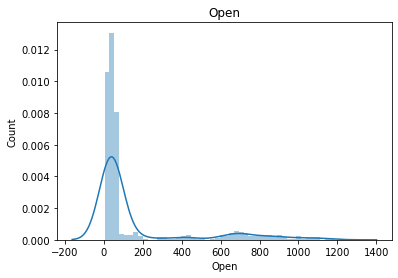

<Figure size 1080x1080 with 0 Axes>

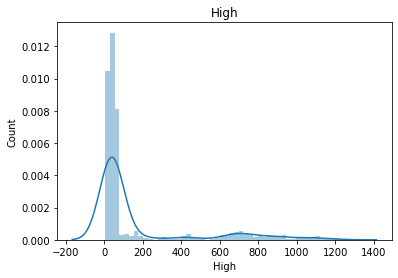

<Figure size 1080x1080 with 0 Axes>

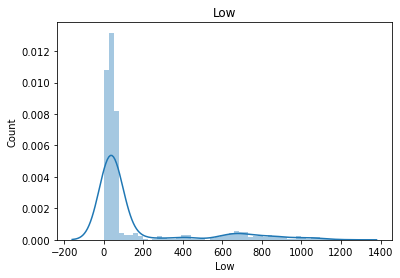

<Figure size 1080x1080 with 0 Axes>

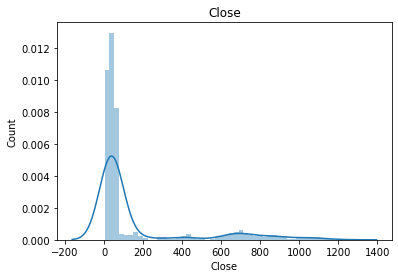

<Figure size 1080x1080 with 0 Axes>

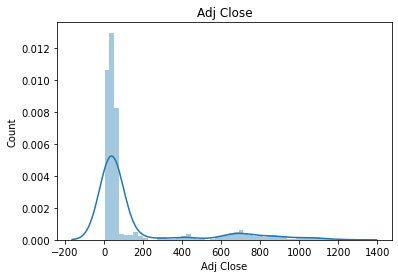

<Figure size 1080x1080 with 0 Axes>

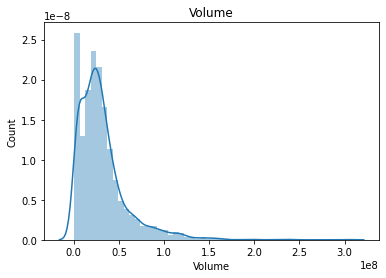

<Figure size 1080x1080 with 0 Axes>

In [8]:
for feature in num_features:           #plotting distribution of features for model
    Data=Data.copy()
    sns.distplot(Data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [9]:
# Convert the Date column to DateTime object
Data['Date'] = pd.to_datetime(Data['Date'])

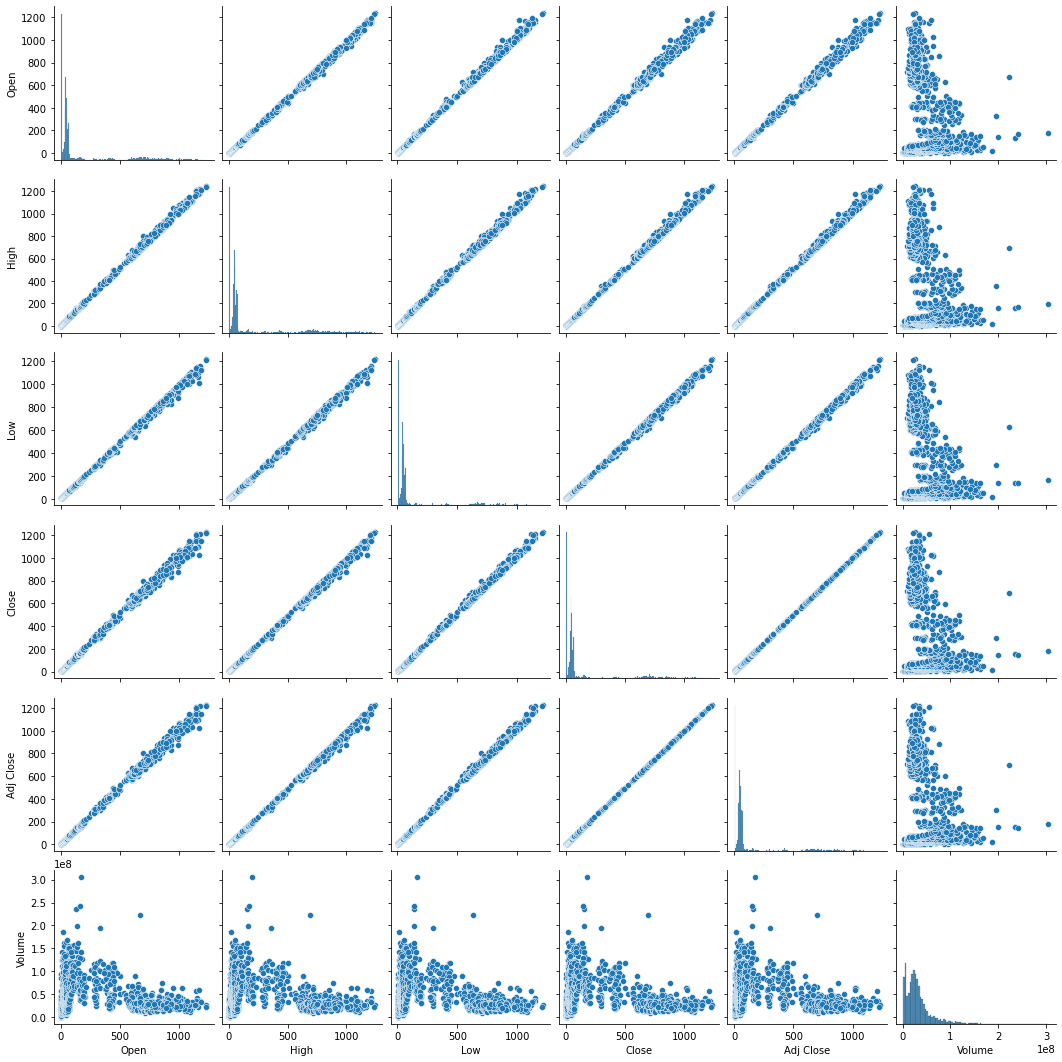

In [10]:
sns.pairplot(Data)   # plotting pairplot to visualise distribution and relation among data attributes

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

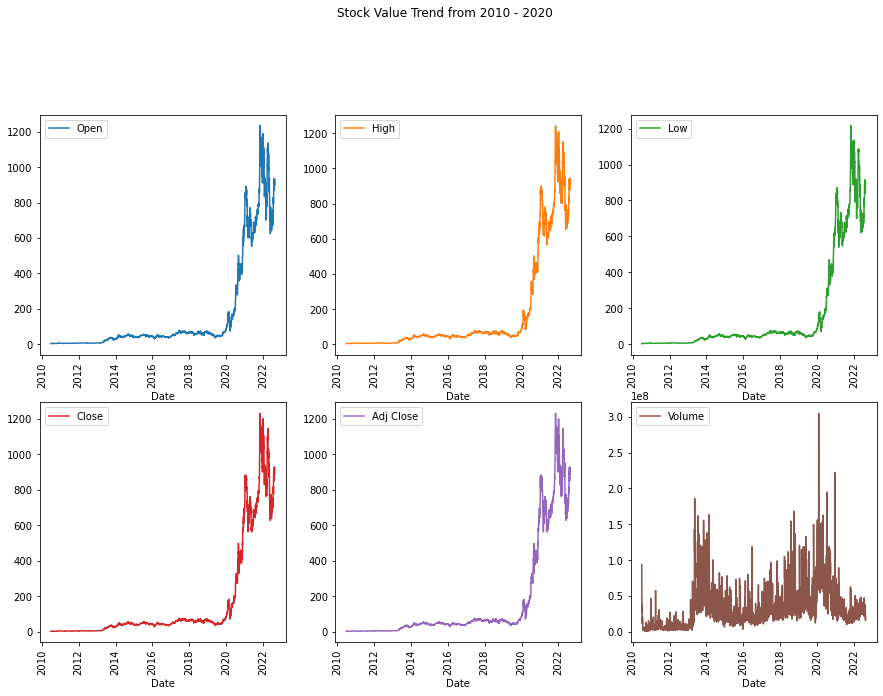

In [11]:
# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
Data.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), 
          sharex = False, title = "Stock Value Trend from 2010 - 2020", rot = 90)

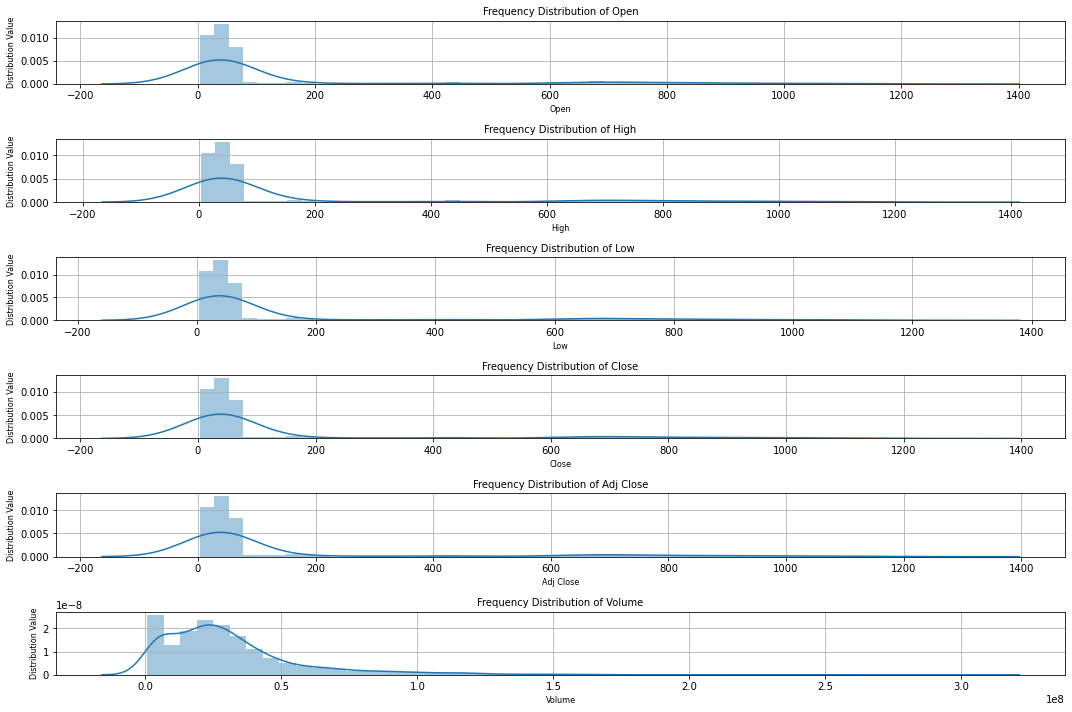

In [12]:
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

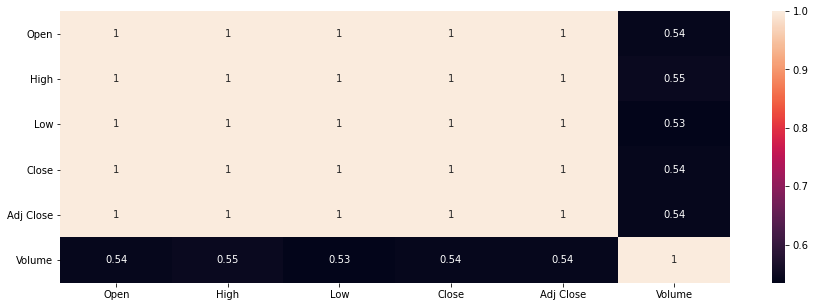

In [13]:
corrmat = Data.corr(method = "spearman")        #plotting correlation matrix
plt.figure(figsize=(15,5))
plot=sns.heatmap(corrmat,annot=True)

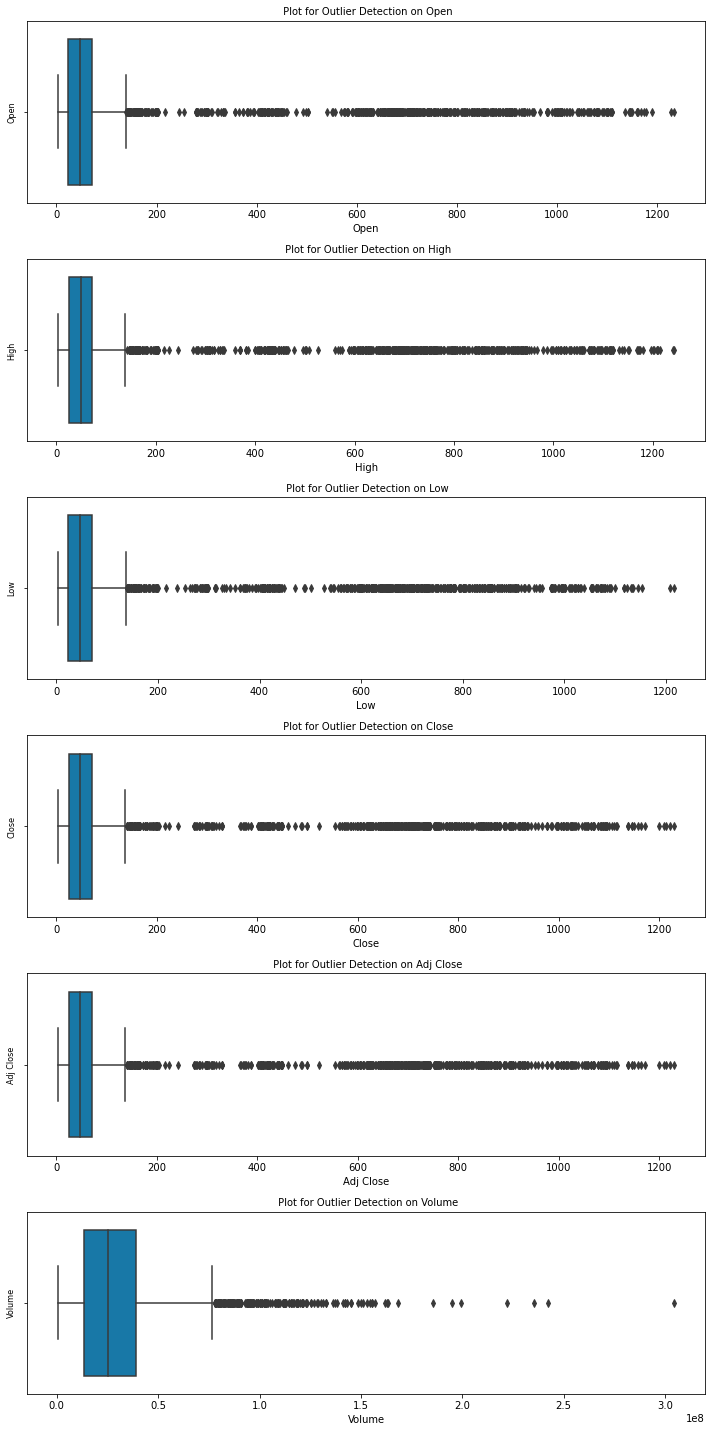

In [14]:
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))  # plotting box plots for outliers

for i, col_list in enumerate(Column_List):
    sns.boxplot(Data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title(" Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [15]:
Data['Date'] = pd.to_datetime(Data['Date'])   #changing date to datetime dtype

In [16]:
from scipy import stats
from pandas.plotting import table
import datetime as dt
# Remove the variables either using IQR technique or Z-Score
Descriptive_Statistics = Data.describe()
Descriptive_Statistics = Descriptive_Statistics.T # Convert into a dataframe

# Extract the IQR values 
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
Data = Data[(np.abs(stats.zscore(Data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] # abs for (+/-) 3-sigma
Data = Data.reset_index() # Due to elimination of rows, index has to be reset


In [17]:
Data['Year'] = Data['Date'].dt.year            #converting date into year,month,day
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday

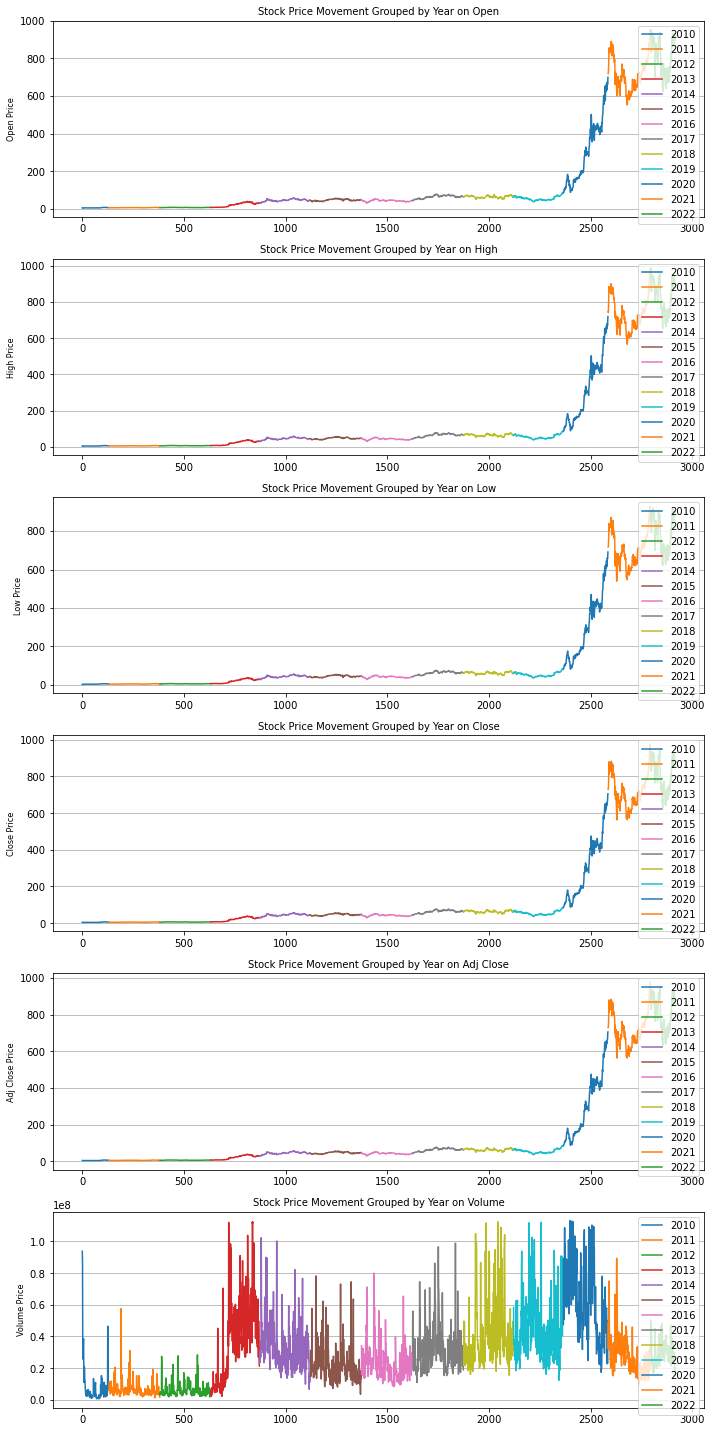

In [18]:
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

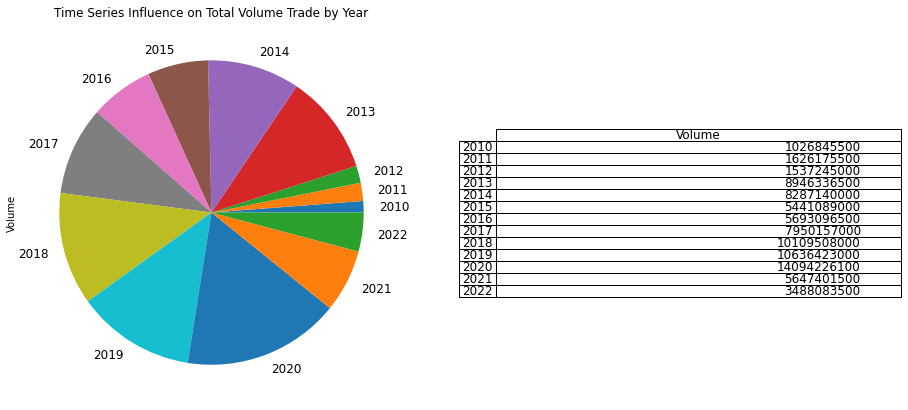

In [19]:
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Year')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

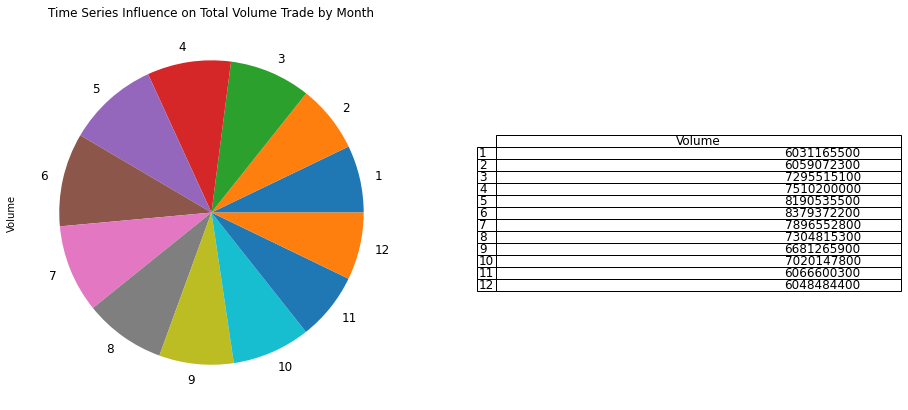

In [20]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

In [21]:
import matplotlib.gridspec as gridspec   #importing libraries for deep learning models
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as ks
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Bidirectional, Lambda, Input
from tensorflow.keras.models import Model
plt.style.use('default')
plt.style.use('ggplot')

In [22]:
df = pd.read_csv("TSLA.csv")   # reading datafile

In [23]:
df.head()            #visualising data 

Date  Open  High  Low  Close  Adj Close    Volume
0  2010-06-29  3.80  5.00 3.51   4.78       4.78  93831500
1  2010-06-30  5.16  6.08 4.66   4.77       4.77  85935500
2  2010-07-01  5.00  5.18 4.05   4.39       4.39  41094000
3  2010-07-02  4.60  4.62 3.74   3.84       3.84  25699000
4  2010-07-06  4.00  4.00 3.17   3.22       3.22  34334500

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')    #changing date into datetime format

In [25]:
df2 = df[['High', 'Low', 'Open', 'Close']]              # creating new data with required features only
df2.head()

High  Low  Open  Close
0  5.00 3.51  3.80   4.78
1  6.08 4.66  5.16   4.77
2  5.18 4.05  5.00   4.39
3  4.62 3.74  4.60   3.84
4  4.00 3.17  4.00   3.22

##### Preprocessing the data and spliting for model training and validation for stock price forecasting

In [26]:
def load_data(seq_len, series):
    x_data = []
    y_data = []

    for i in range(seq_len, len(series)):
        x = []
        y = []
        x.append([series['High'].iloc[i-seq_len: i].values])
        y.append(series['High'].iloc[i])
        x.append([series['Low'].iloc[i-seq_len: i].values])
        y.append(series['Low'].iloc[i])
        x.append([series['Open'].iloc[i-seq_len: i].values])
        y.append(series['Open'].iloc[i])
        x.append([series['Close'].iloc[i-seq_len: i].values])
        y.append(series['Close'].iloc[i])
        x_data.append(x)
        y_data.append(y)
  
    x_data_train = x_data[:int(0.9*(len(series)))]
    x_data_val = x_data[int(0.9*(len(series))):]


    y_data_train = y_data[:int(0.9*(len(series)))]
    y_data_val = y_data[int(0.9*(len(series))):]

    x_train = np.array(x_data_train)
    x_val = np.array(x_data_val)

    y_train = np.array(y_data_train)
    y_val = np.array(y_data_val)
    x_train = np.reshape(x_train, (x_train.shape[0], 4, seq_len))
    x_val = np.reshape(x_val, (x_val.shape[0], 4, seq_len))

    y_train = np.reshape(y_train, (y_train.shape[0], 1, 4))
    y_val = np.reshape(y_val, (y_val.shape[0], 1, 4))

    x_full = np.array(x_data)
    x_full = np.reshape(x_full, (x_full.shape[0], 4, seq_len))
    y_full = np.array(y_data)
    y_full = np.reshape(y_full, (y_full.shape[0], 1, 4))
  
    return (x_train, x_val, y_train, y_val, x_full, y_full)

In [27]:
(x_train, x_val, y_train, y_val, x_full, y_full) = load_data(64, df2)   #splitting dataset into train and test

In [28]:
print(f'the shape of all x_train is {x_train.shape}\n\
the shape of all y_train is {y_train.shape}\n\
the shape of all x_val is {x_val.shape}\n\
the shape of all y_val is {y_val.shape}')

the shape of all x_train is (2752, 4, 64)
the shape of all y_train is (2752, 1, 4)
the shape of all x_val is (242, 4, 64)
the shape of all y_val is (242, 1, 4)


In [29]:
def make_dataset(x, y, buffer_size=1000, batch_size=150):   #creating data for conv-bilstm model
    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.cache().shuffle(buffer_size).batch(batch_size)
    return data

In [30]:
train_dataset = make_dataset(x_train, y_train)
val_dataset = make_dataset(x_val, y_val)

##### Creating a custom model which produce multiple outputs for high, low , open and for closing stock Prices

##### Conv_BILSTM model

In [31]:
def base_model(inputs):
    x = Conv1D(filters=128,kernel_size=4, activation='relu', name='conv_1D')(inputs)
    x = Bidirectional(LSTM(units=64, return_sequences=True, name='b_lstm_1'))(x)
    x = ks.layers.Dropout(0.2)(x)
    x = Bidirectional(LSTM(units=64, return_sequences=True, name='b_lstm_2'))(x)
    x = ks.layers.Dropout(0.2)(x)
    x = LSTM(units=32, return_sequences=True, name='lstm_3')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    x = Dense(units=128, activation='relu', name='dense_1')(inputs)
    x = Dense(units=64, name='dense_2')(x)
    x = Lambda(lambda x:x*16, name='lambda_1')(x)
    high_stock = Dense(1, name='high_stock')(x)
    low_stock = Dense(1, name='low_stock')(x)
    open_stock = Dense(1, name='open_stock')(x)
    close_stock = Dense(1, name='close_stock')(x)
  
    model = Model(inputs=inputs, outputs=[high_stock, low_stock, open_stock, close_stock])
    return model

In [32]:
inputs =Input(shape=(4, 64, ))
model = final_model(inputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 64)]      0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4, 128)       8320        input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 4, 64)        8256        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4, 64)        0           dense_2[0][0]                    
______________________________________________________________________________________________

#####  learning rate scheduler to pick up the best learning rate for the optimizer. we use Stochastic gradient descent as our optimizer and Huber loss function , set the metric as mean squared error

In [33]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch /22))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss={
    'high_stock': ks.losses.Huber(), 
    'low_stock': ks.losses.Huber(),
    'open_stock': ks.losses.Huber(), 
    'close_stock': ks.losses.Huber() 
    },
     optimizer=optimizer,
     metrics={
         'high_stock': ['mae'], 
        'low_stock': ['mae'], 
        'open_stock': ['mae'],
        'close_stock': ['mae']
        })
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lr_schedule], verbose=0)

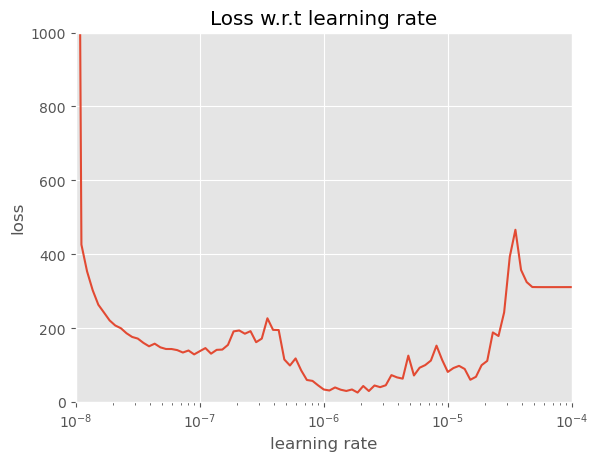

In [34]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 1000])
plt.title('Loss w.r.t learning rate')
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

##### Now lets choose a best learning rate by visualizing the above plot and train our model again from scratch

In [35]:
model = final_model(inputs)
model.compile(loss={
    'high_stock': ks.losses.Huber(), 
    'low_stock': ks.losses.Huber(),
    'open_stock': ks.losses.Huber(), 
    'close_stock': ks.losses.Huber() 
    },
     optimizer=ks.optimizers.SGD(learning_rate=1e-6, momentum=0.9),
     metrics={
         'high_stock': ['mae'], 
        'low_stock': ['mae'], 
        'open_stock': ['mae'],
        'close_stock': ['mae']
        })
history = model.fit(x_train, y_train, epochs=1300, verbose=0)

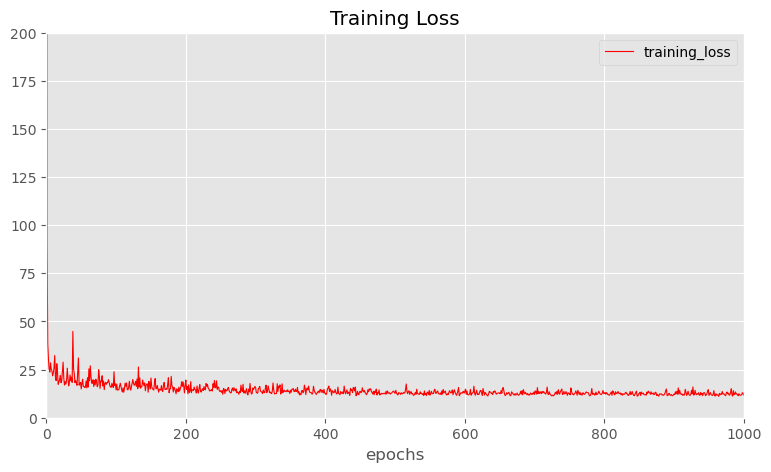

In [36]:
loss = history.history['loss']
epochs = range(len(loss))
plt.style.use('default')
plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
#plt.plot(epochs[400:], mae, color='blue', label='trainig_mae')
plt.plot(epochs, loss, color='red', label='training_loss', linewidth=0.8)
plt.title('Training Loss')
plt.xlabel('epochs')
plt.xlim(0, 1000)
plt.ylim(0, 200)
plt.legend()
plt.show()


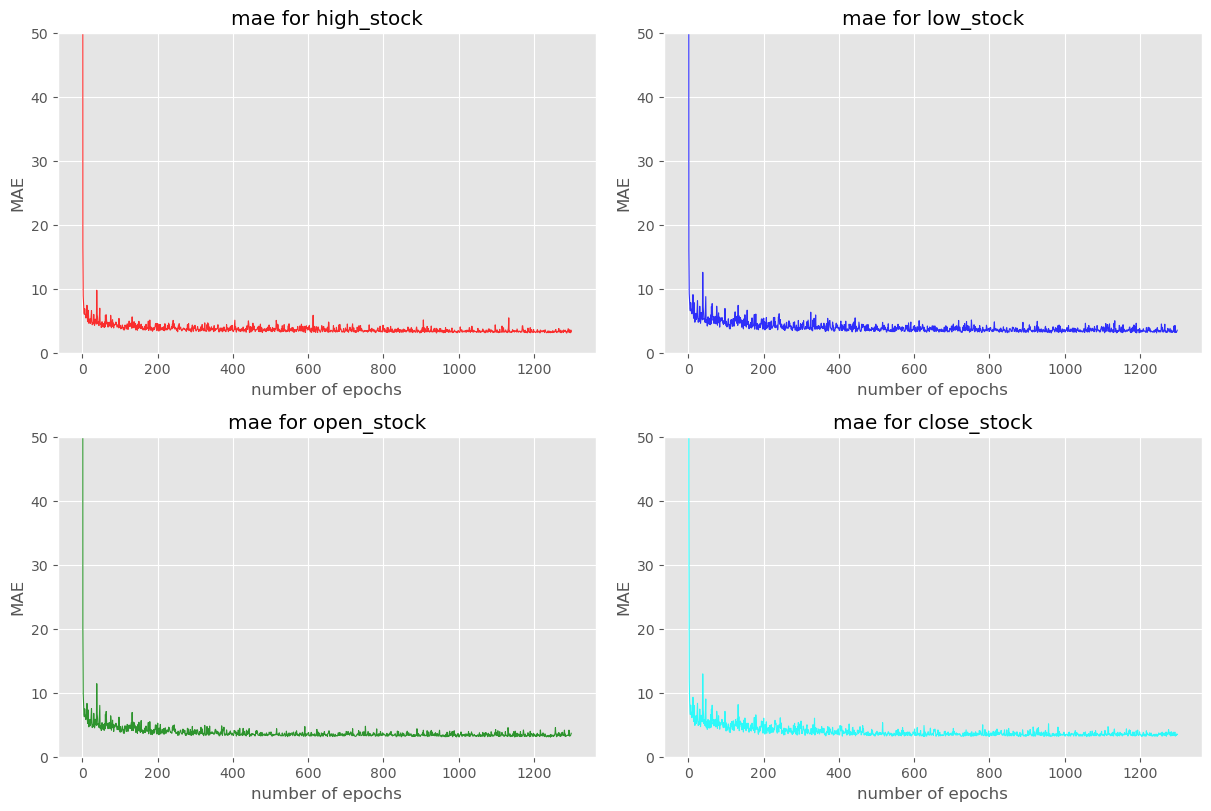

In [37]:
high_stock_mae = history.history['high_stock_mae']
low_stock_mae = history.history['low_stock_mae']
open_stock_mae = history.history['open_stock_mae']
close_stock_mae = history.history['close_stock_mae']
epochs = range(len(high_stock_mae))
result = []
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
spec = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax = [ax1, ax2, ax3, ax4]
stock = [high_stock_mae, low_stock_mae, open_stock_mae, close_stock_mae]
title_stock = ['mae for high_stock', 'mae for low_stock', 'mae for open_stock', 'mae for close_stock']
color = ['red', 'blue', 'green', 'cyan']
for i in range(4):
    ax[i].plot(epochs, stock[i], color=color[i], alpha=0.8, linewidth=0.8)
    ax[i].set_ylim(0, 50)
    ax[i].set_title(title_stock[i])
    ax[i].set_xlabel('number of epochs')
    ax[i].set_ylabel('MAE')

In [38]:
history1 = model.evaluate(x_val,y_val)

8/8 [==============================] - 0s 3ms/step - loss: 148.3091 - high_stock_loss: 33.5295 - low_stock_loss: 33.4949 - open_stock_loss: 48.2782 - close_stock_loss: 33.0064 - high_stock_mae: 34.0261 - low_stock_mae: 33.9905 - open_stock_mae: 48.7766 - close_stock_mae: 33.5024


###### from the above few visuals it's proven that the model is performing good .So its time for the model to face and forecast some new data which it has'nt seen before

In [39]:
forecast = model.predict(x_val)
forecast = np.array(forecast)
forecast.shape

(4, 242, 4, 1)

###### forecasted values are clustered in a nested list. the below function makes the task to seperate the stock values inorder to visualize

In [40]:
def sep_target(data):
    high_hat = []
    low_hat = []
    open_hat = []
    close_hat = []
    for zeroth in data[0, :, :]:
        high_hat.append(zeroth[0][0])
        low_hat.append(zeroth[1][0])
        open_hat.append(zeroth[2][0])
        close_hat.append(zeroth[3][0])
    high_hat = np.array(high_hat)
    low_hat = np.array(low_hat)
    open_hat = np.array(open_hat)
    close_hat = np.array(close_hat)
    return (high_hat, low_hat, open_hat, close_hat)

In [41]:
high_preds, low_preds, open_preds, close_preds = sep_target(forecast)

In [42]:
def sep_ans(data):
    high_hat = []
    low_hat = []
    open_hat = []
    close_hat = []
    for zeroth in data[:, 0]:
        high_hat.append(zeroth[0])
        low_hat.append(zeroth[1])
        open_hat.append(zeroth[2])
        close_hat.append(zeroth[3])
    high_hat = np.array(high_hat)
    low_hat = np.array(low_hat)
    open_hat = np.array(open_hat)
    close_hat = np.array(close_hat)
    return (high_hat, low_hat, open_hat, close_hat)

In [43]:
high_real, low_real, open_real, close_real = sep_ans(y_val)

In [44]:
def plt_forecast(x, y, title):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(x, color='red', linewidth=1.2, label='predicted value')
    plt.plot(y, color='blue', linewidth=0.9, label='true value')
    plt.title(title, fontsize=40)
    plt.legend(fontsize=30)
  
    plt.show()

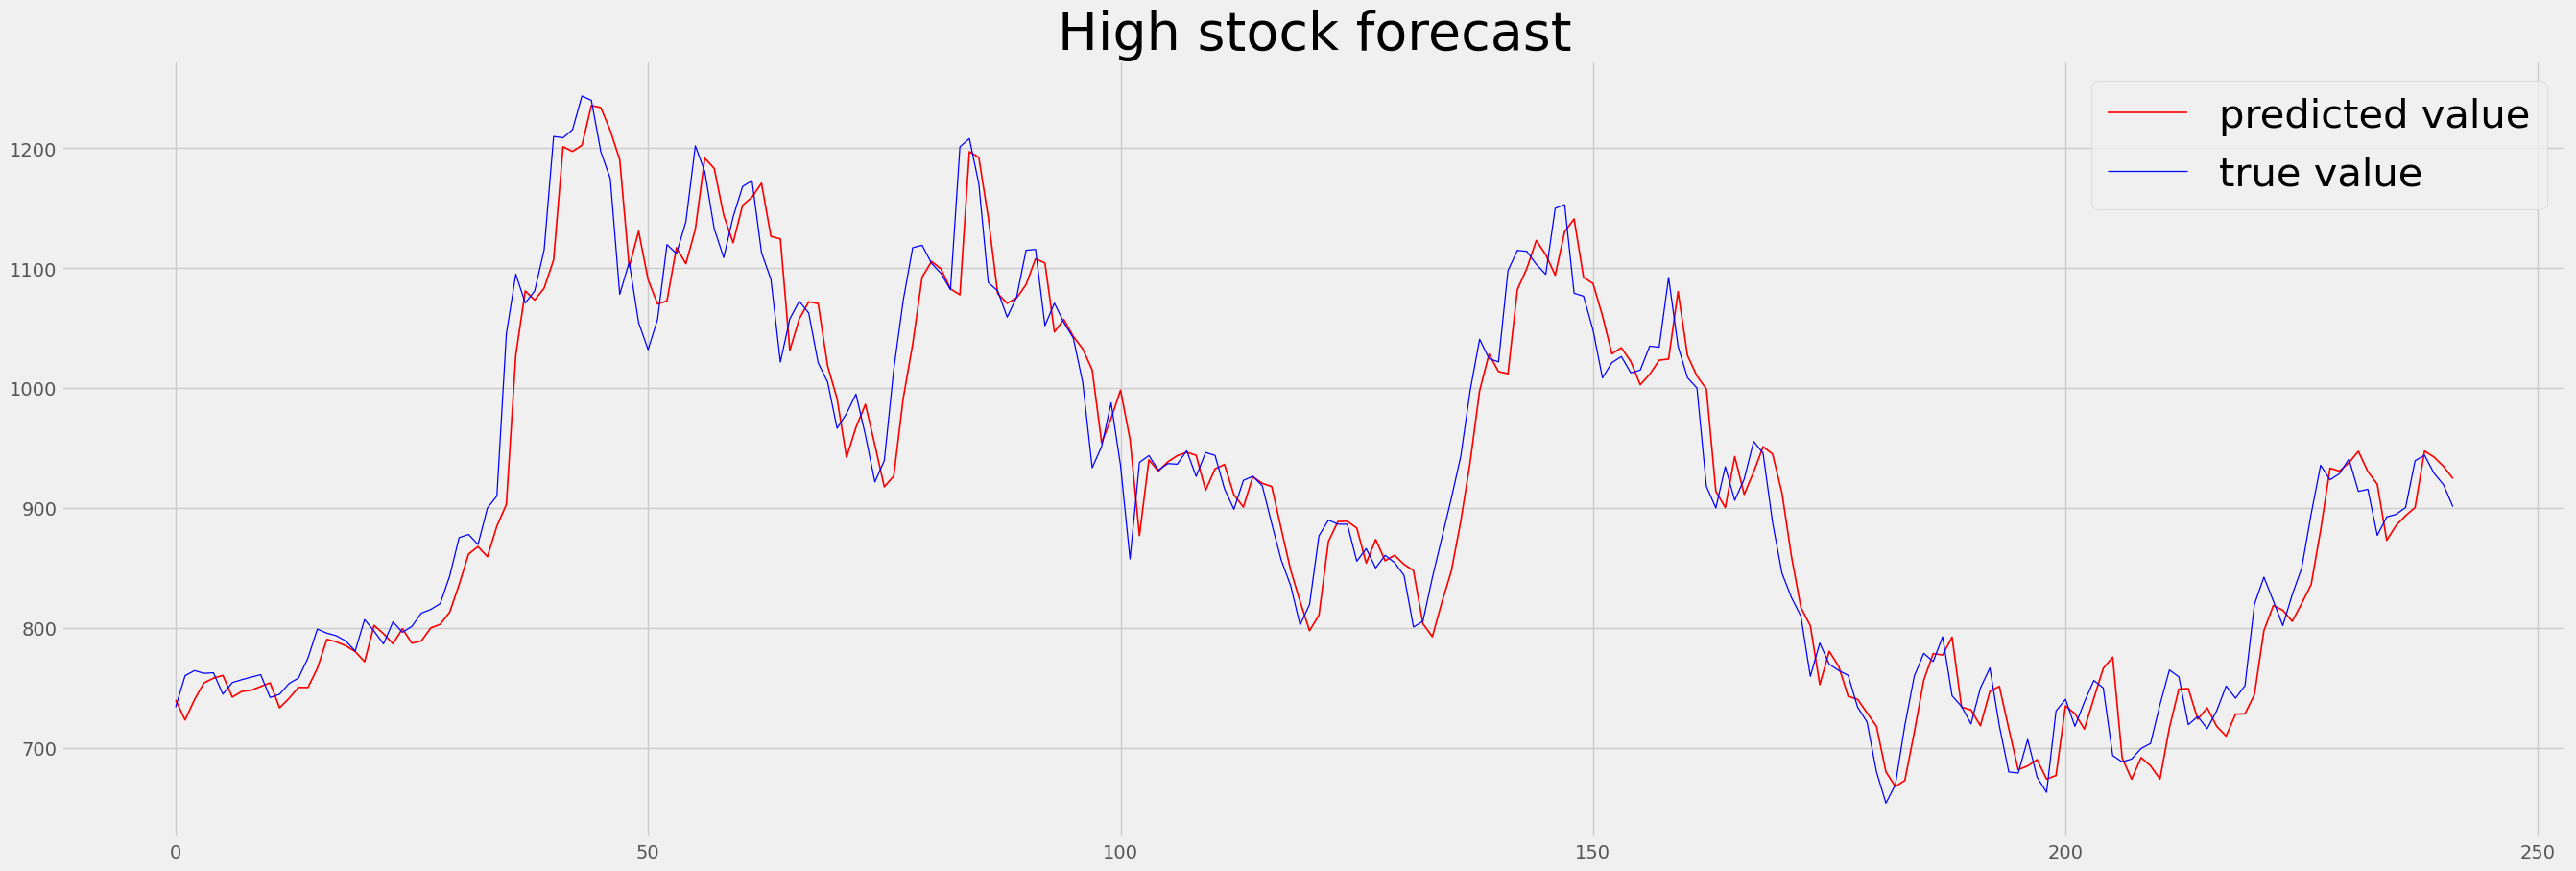

In [45]:
plt_forecast(high_preds, high_real, 'High stock forecast')

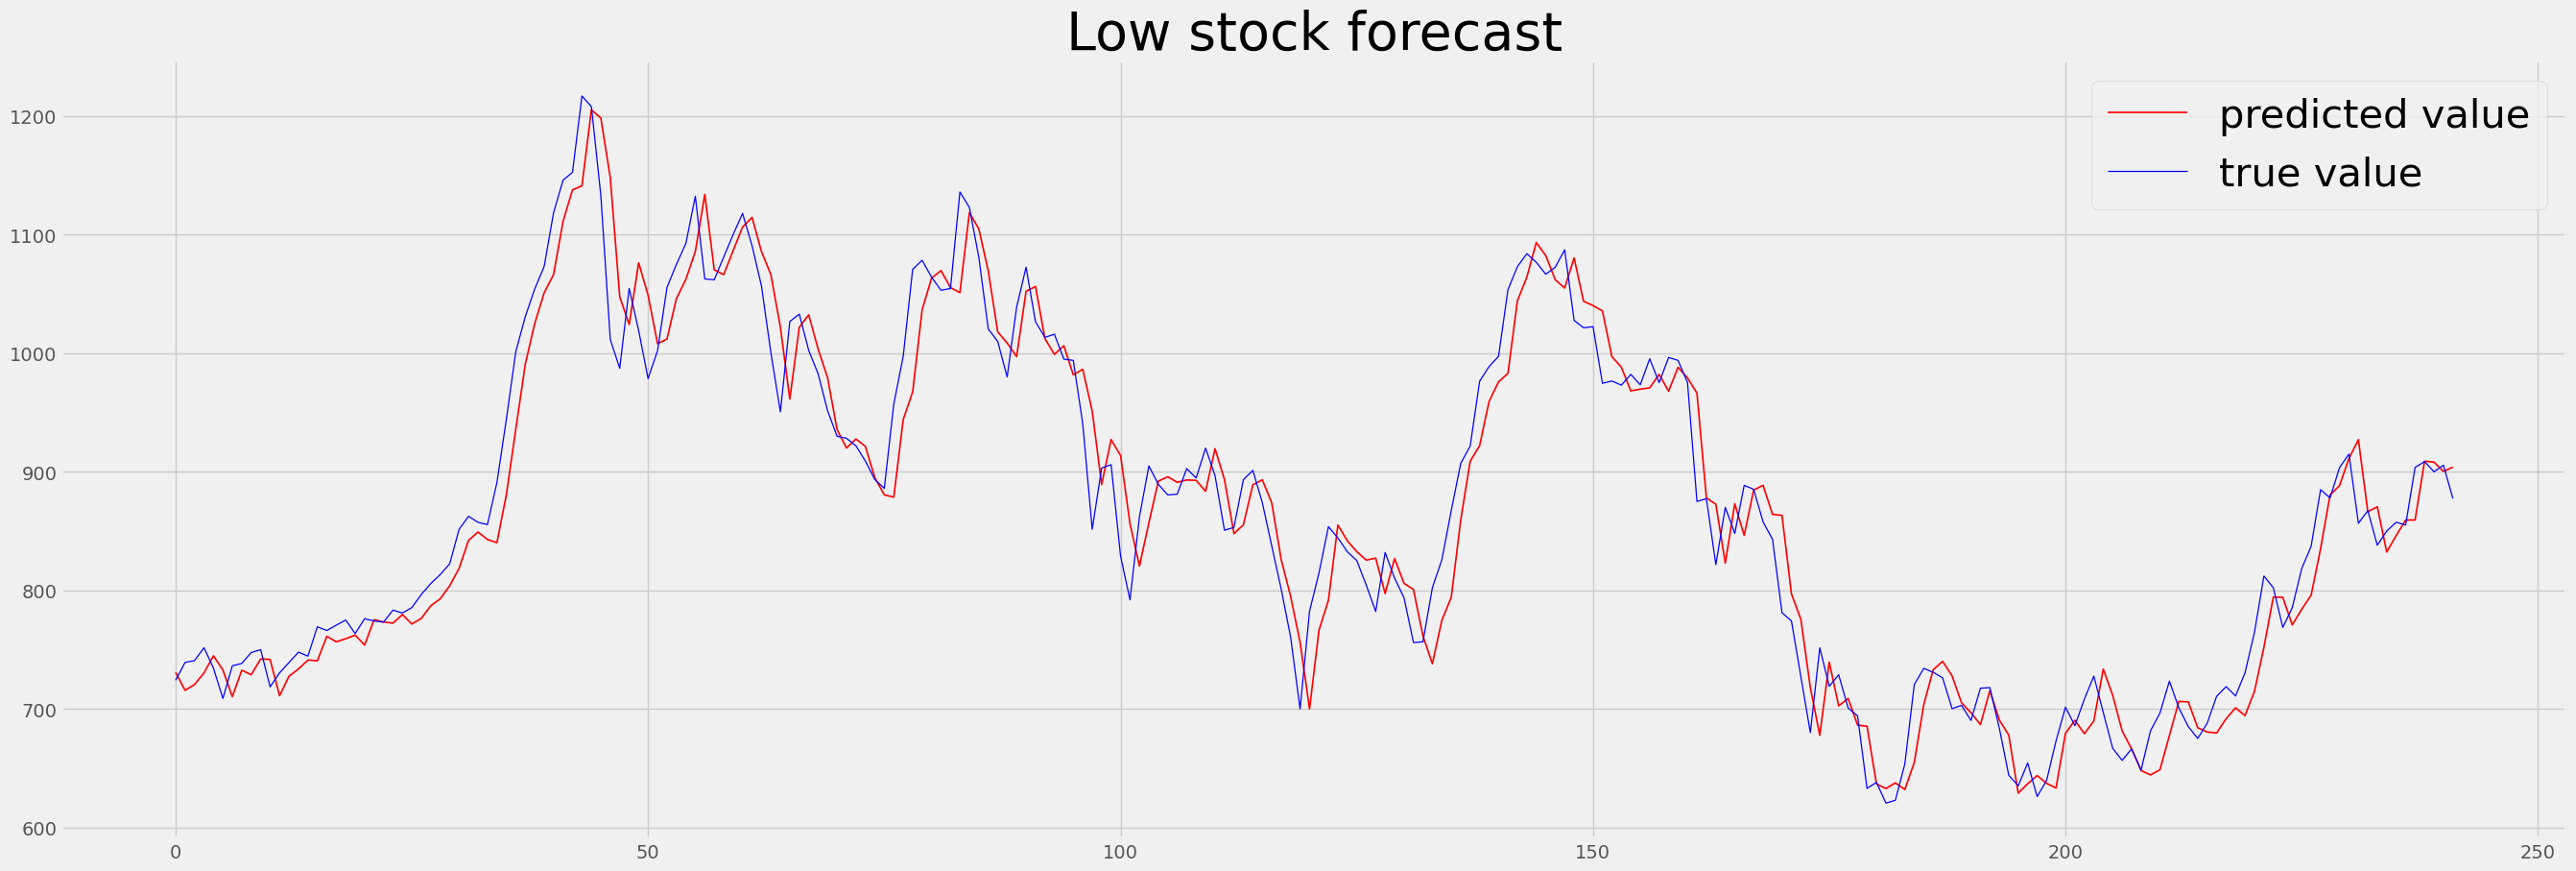

In [46]:
plt_forecast(low_preds, low_real, 'Low stock forecast')

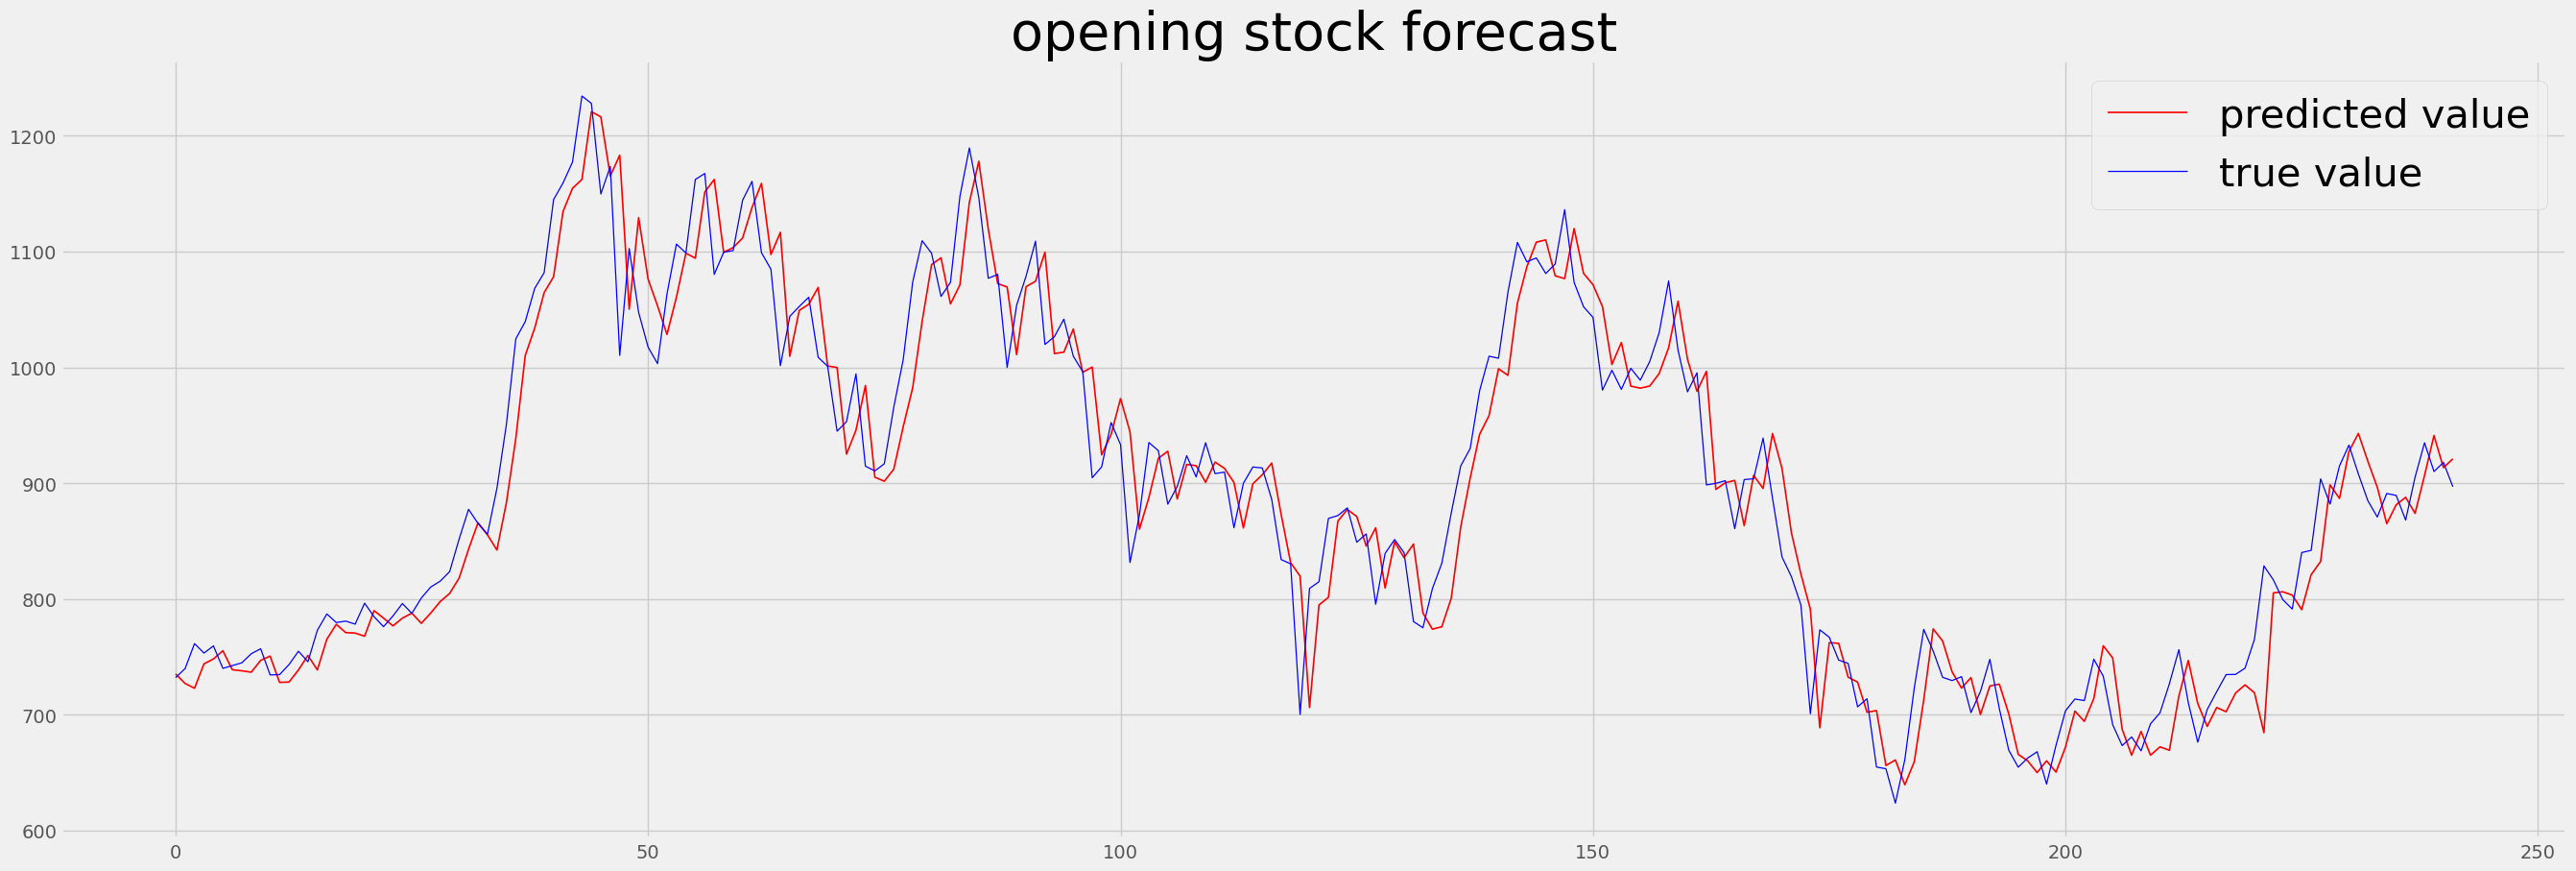

In [47]:
plt_forecast(open_preds, open_real, 'opening stock forecast')

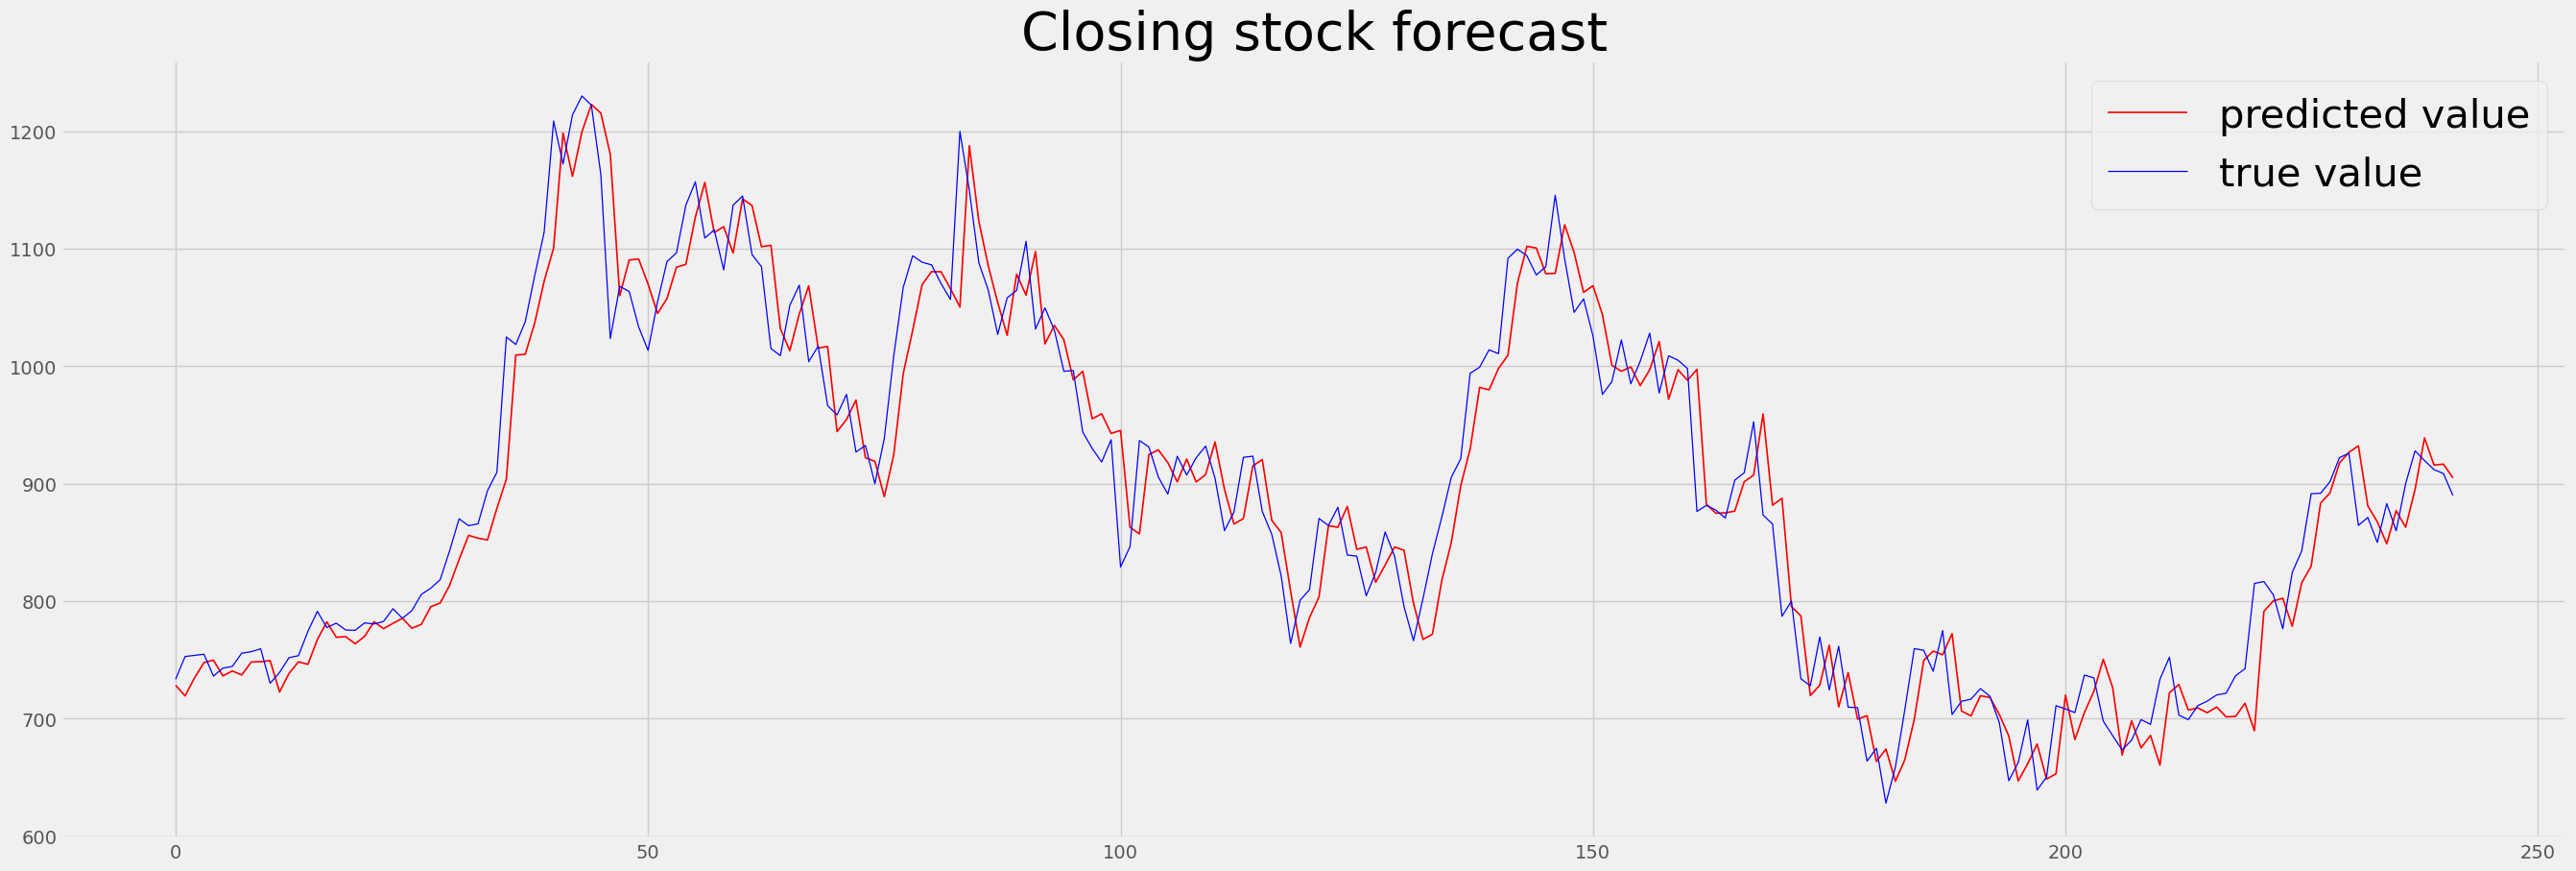

In [48]:
plt_forecast(close_preds, close_real, 'Closing stock forecast')

##### Conv_LSTM model

In [49]:
def base_model(inputs):
    x = Conv1D(filters=128,kernel_size=4, activation='relu', name='conv_1D')(inputs)
    x = (LSTM(units=64, return_sequences=True, name='lstm_1'))(x)
    x = ks.layers.Dropout(0.2)(x)
    x = (LSTM(units=128, return_sequences=True, name='lstm_2'))(x)
    x = ks.layers.Dropout(0.2)(x)
    x = LSTM(units=32, return_sequences=True, name='lstm_3')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    x = Dense(units=128, activation='relu', name='dense_1')(inputs)
    x = Dense(units=64, name='dense_2')(x)
    x = Lambda(lambda x:x*16, name='lambda_1')(x)
    high_stock = Dense(1, name='high_stock')(x)
    low_stock = Dense(1, name='low_stock')(x)
    open_stock = Dense(1, name='open_stock')(x)
    close_stock = Dense(1, name='close_stock')(x)
  
    model = Model(inputs=inputs, outputs=[high_stock, low_stock, open_stock, close_stock])
    return model

In [50]:
inputs =Input(shape=(4, 64, ))
model = final_model(inputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4, 64)]      0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4, 128)       8320        input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 4, 64)        8256        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4, 64)        0           dense_2[0][0]                    
____________________________________________________________________________________________

##### using lr_scheduler and SGD optimizer

In [51]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch /22))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss={
    'high_stock': ks.losses.Huber(), 
    'low_stock': ks.losses.Huber(),
    'open_stock': ks.losses.Huber(), 
    'close_stock': ks.losses.Huber() 
    },
     optimizer=optimizer,
     metrics={
         'high_stock': ['mae'], 
        'low_stock': ['mae'], 
        'open_stock': ['mae'],
        'close_stock': ['mae']
        })
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lr_schedule], verbose=0)

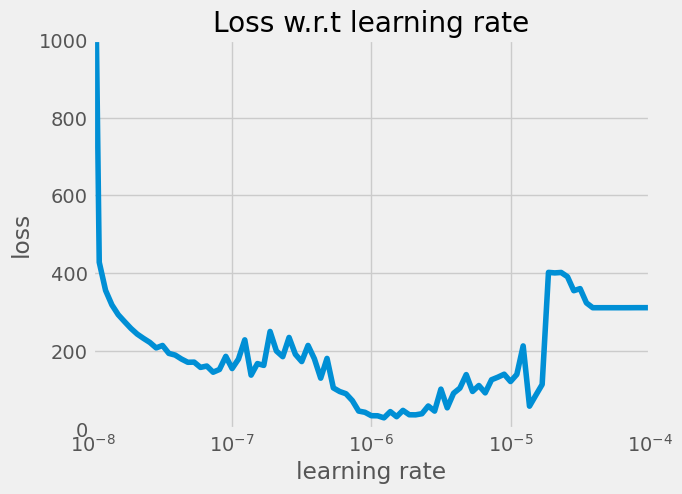

In [52]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 1000])
plt.title('Loss w.r.t learning rate')
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

In [53]:
model = final_model(inputs)
model.compile(loss={
    'high_stock': ks.losses.Huber(), 
    'low_stock': ks.losses.Huber(),
    'open_stock': ks.losses.Huber(), 
    'close_stock': ks.losses.Huber() 
    },
     optimizer=ks.optimizers.SGD(learning_rate=1e-6, momentum=0.9),
     metrics={
         'high_stock': ['mae'], 
        'low_stock': ['mae'], 
        'open_stock': ['mae'],
        'close_stock': ['mae']
        })
history = model.fit(x_train, y_train, epochs=1300, verbose=0)

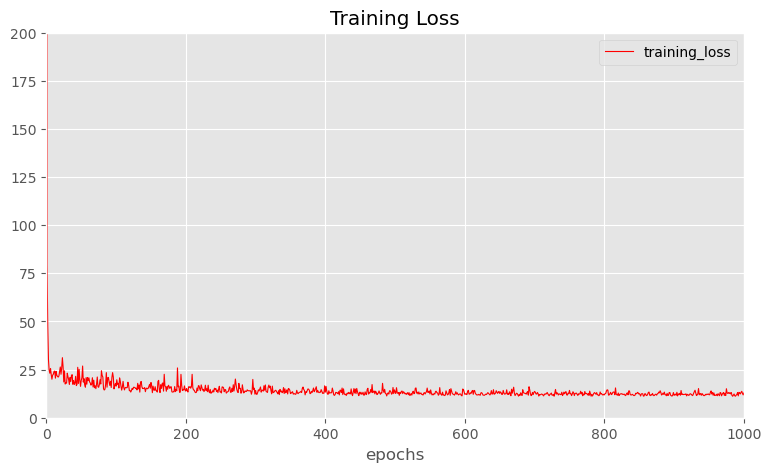

In [54]:
loss = history.history['loss']
epochs = range(len(loss))
plt.style.use('default')
plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
#plt.plot(epochs[400:], mae, color='blue', label='trainig_mae')
plt.plot(epochs, loss, color='red', label='training_loss', linewidth=0.8)
plt.title('Training Loss')
plt.xlabel('epochs')
plt.xlim(0, 1000)
plt.ylim(0, 200)
plt.legend()
plt.show()

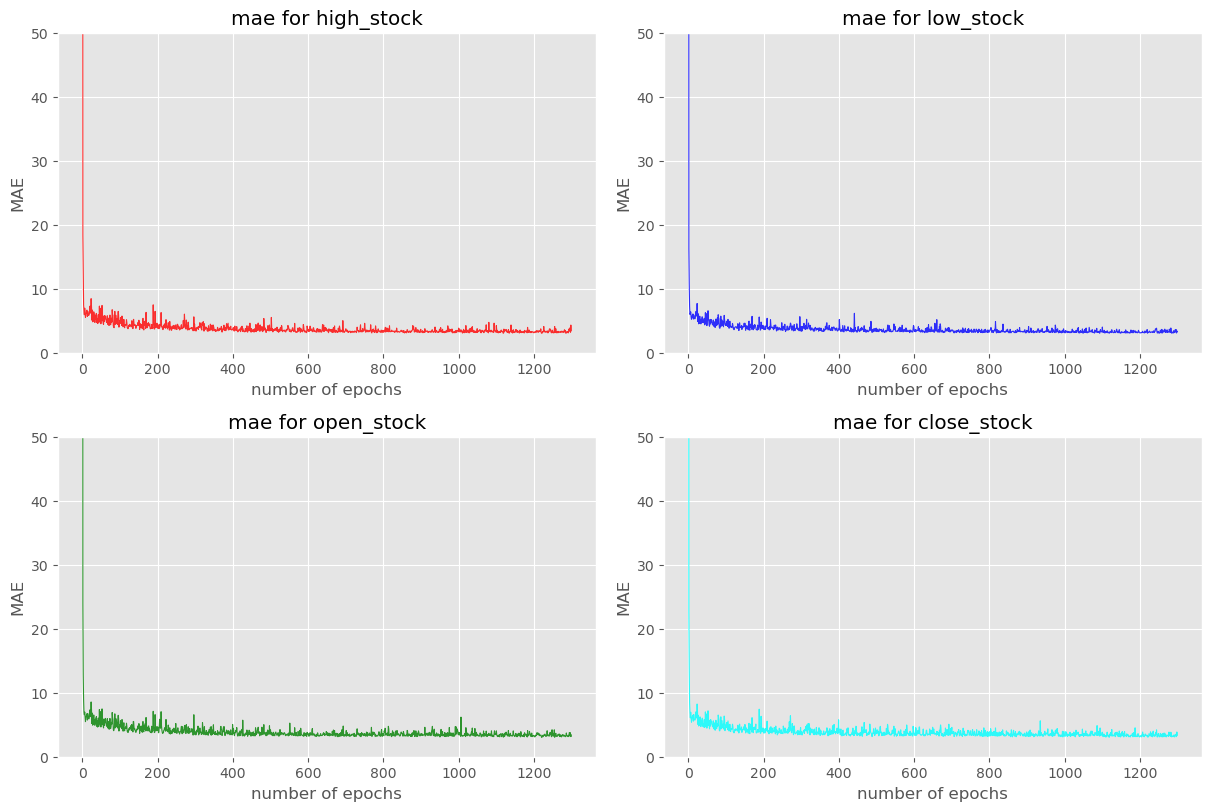

In [55]:
high_stock_mae = history.history['high_stock_mae']
low_stock_mae = history.history['low_stock_mae']
open_stock_mae = history.history['open_stock_mae']
close_stock_mae = history.history['close_stock_mae']
epochs = range(len(high_stock_mae))
result = []
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
spec = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax = [ax1, ax2, ax3, ax4]
stock = [high_stock_mae, low_stock_mae, open_stock_mae, close_stock_mae]
title_stock = ['mae for high_stock', 'mae for low_stock', 'mae for open_stock', 'mae for close_stock']
color = ['red', 'blue', 'green', 'cyan']
for i in range(4):
    ax[i].plot(epochs, stock[i], color=color[i], alpha=0.8, linewidth=0.8)
    ax[i].set_ylim(0, 50)
    ax[i].set_title(title_stock[i])
    ax[i].set_xlabel('number of epochs')
    ax[i].set_ylabel('MAE')

In [56]:
history2 = model.evaluate(x_val,y_val)

8/8 [==============================] - 0s 3ms/step - loss: 134.2274 - high_stock_loss: 33.0233 - low_stock_loss: 33.4824 - open_stock_loss: 33.9712 - close_stock_loss: 33.7507 - high_stock_mae: 33.5197 - low_stock_mae: 33.9777 - open_stock_mae: 34.4686 - close_stock_mae: 34.2465


In [57]:
forecast = model.predict(x_val)
forecast = np.array(forecast)
forecast.shape

(4, 242, 4, 1)

In [58]:
def sep_target(data):
    high_hat = []
    low_hat = []
    open_hat = []
    close_hat = []
    for zeroth in data[0, :, :]:
        high_hat.append(zeroth[0][0])
        low_hat.append(zeroth[1][0])
        open_hat.append(zeroth[2][0])
        close_hat.append(zeroth[3][0])
    high_hat = np.array(high_hat)
    low_hat = np.array(low_hat)
    open_hat = np.array(open_hat)
    close_hat = np.array(close_hat)
    return (high_hat, low_hat, open_hat, close_hat)

In [59]:
high_preds, low_preds, open_preds, close_preds = sep_target(forecast)

In [60]:
def sep_ans(data):
    high_hat = []
    low_hat = []
    open_hat = []
    close_hat = []
    for zeroth in data[:, 0]:
        high_hat.append(zeroth[0])
        low_hat.append(zeroth[1])
        open_hat.append(zeroth[2])
        close_hat.append(zeroth[3])
    high_hat = np.array(high_hat)
    low_hat = np.array(low_hat)
    open_hat = np.array(open_hat)
    close_hat = np.array(close_hat)
    return (high_hat, low_hat, open_hat, close_hat)

In [61]:
high_real, low_real, open_real, close_real = sep_ans(y_val)

In [62]:
def plt_forecast(x, y, title):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(x, color='red', linewidth=1.2, label='predicted value')
    plt.plot(y, color='blue', linewidth=0.9, label='true value')
    plt.title(title, fontsize=40)
    plt.legend(fontsize=30)
  
    plt.show()

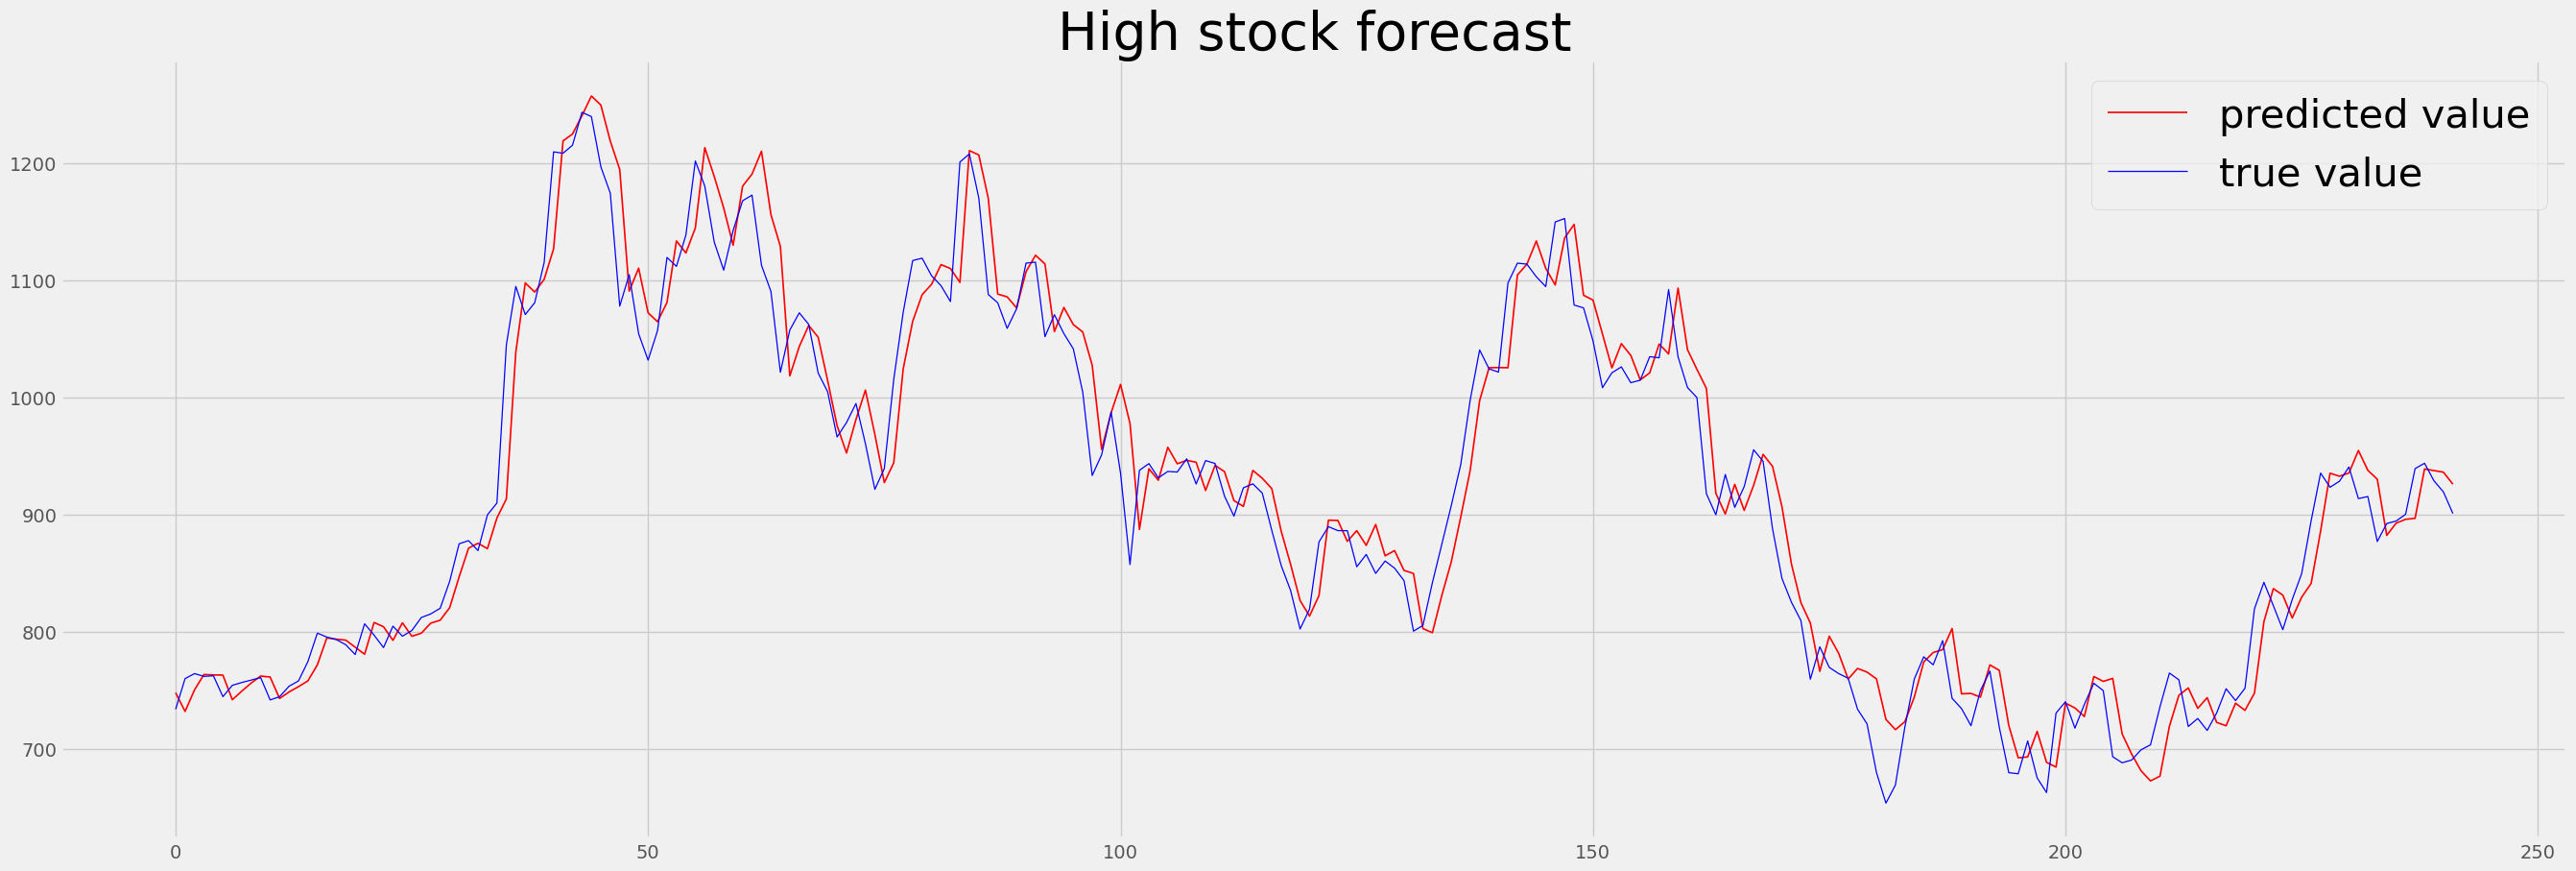

In [63]:
plt_forecast(high_preds, high_real, 'High stock forecast')

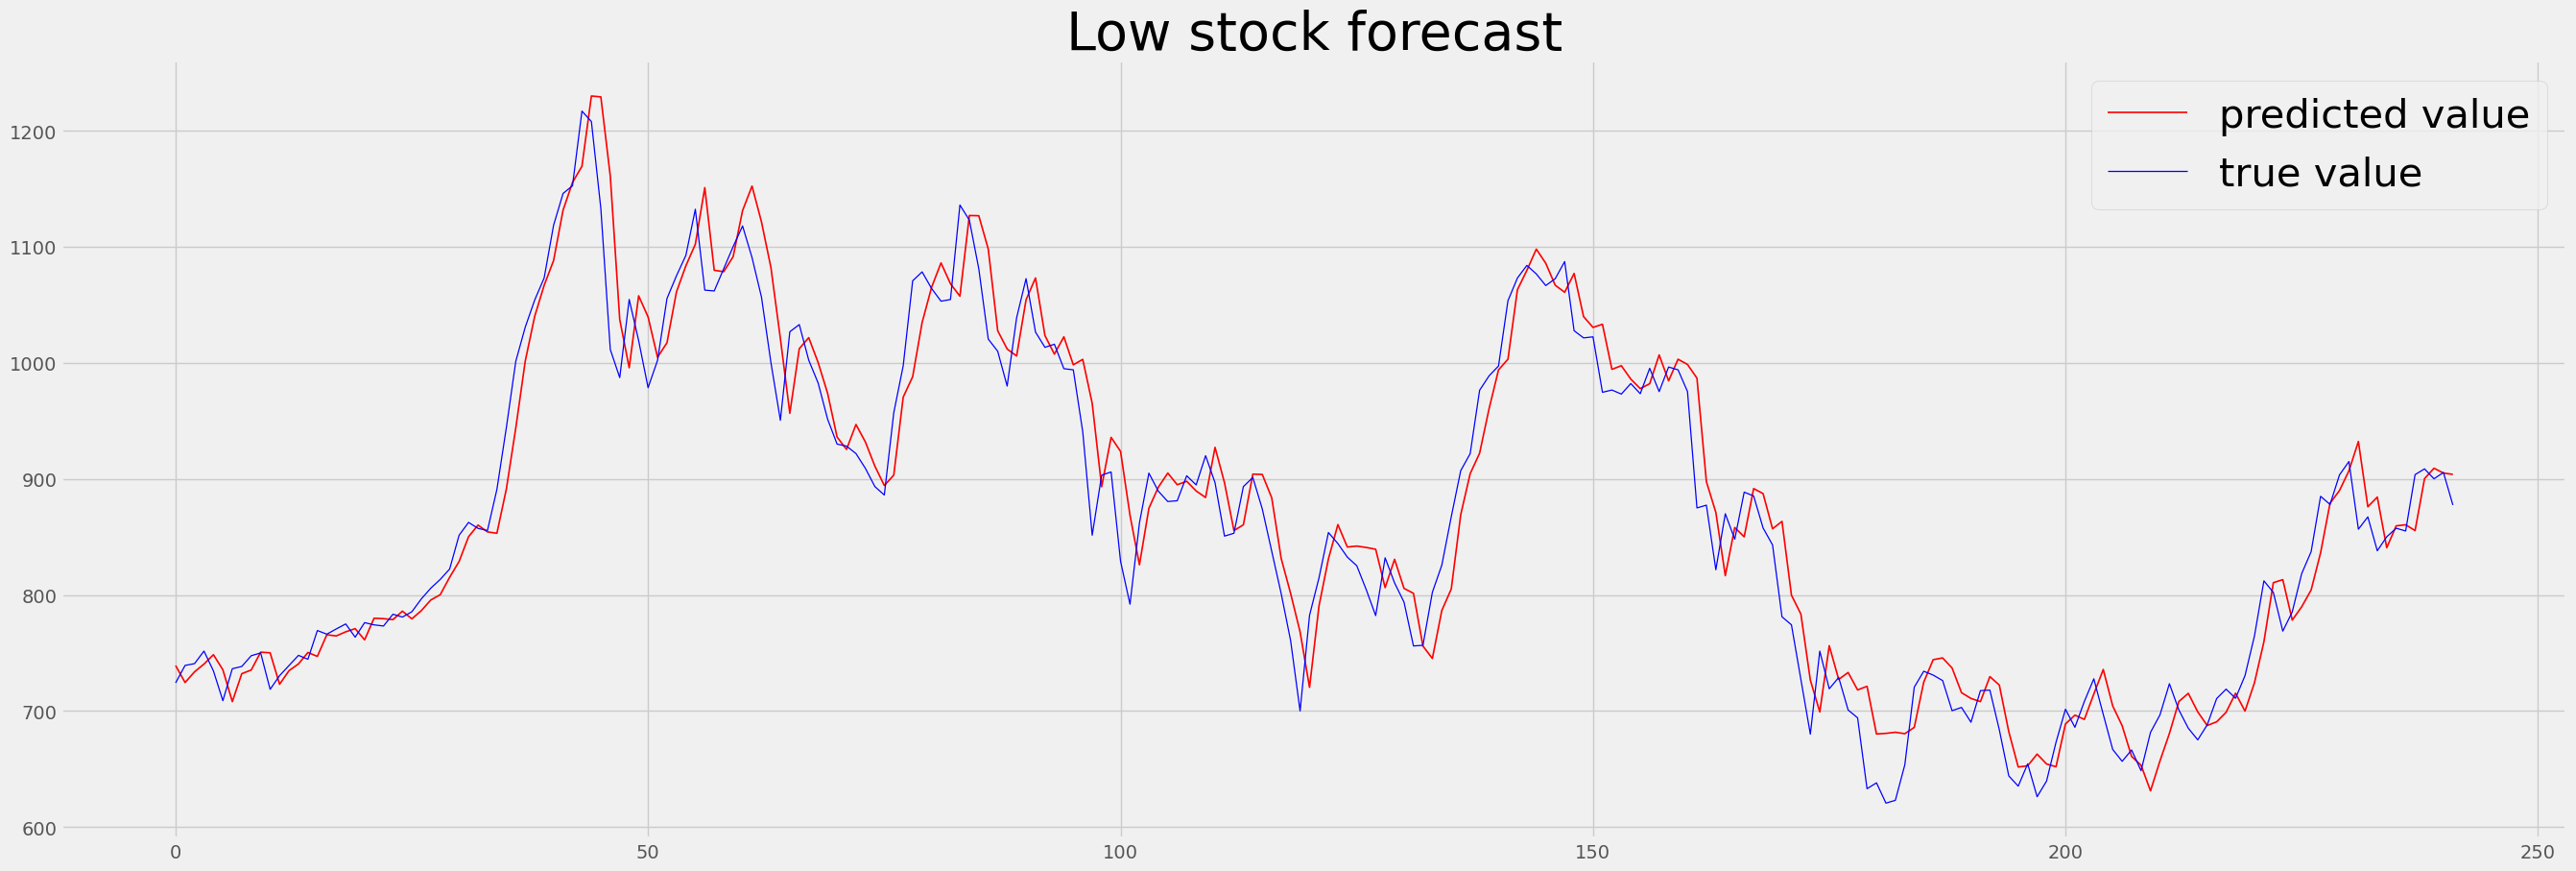

In [64]:
plt_forecast(low_preds, low_real, 'Low stock forecast')

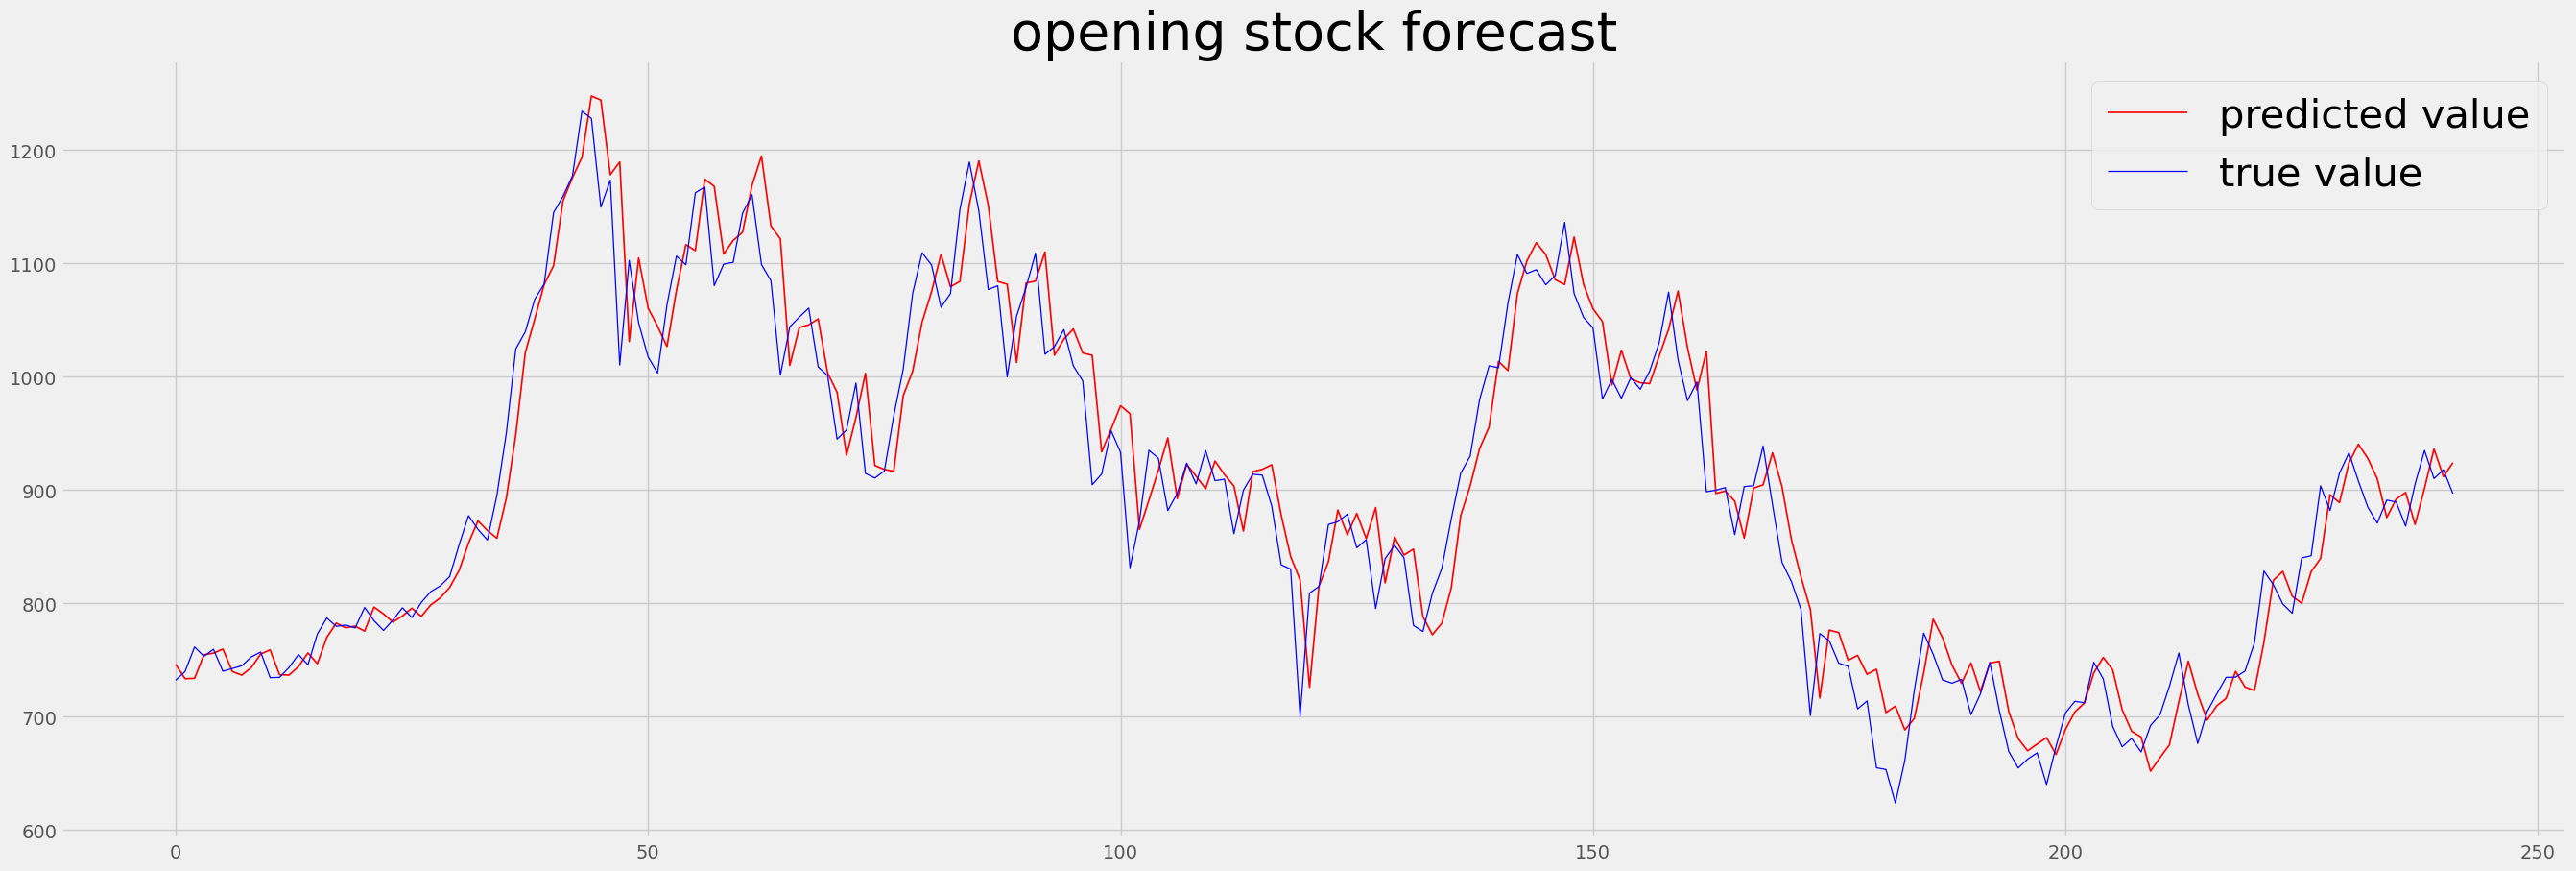

In [65]:
plt_forecast(open_preds, open_real, 'opening stock forecast')

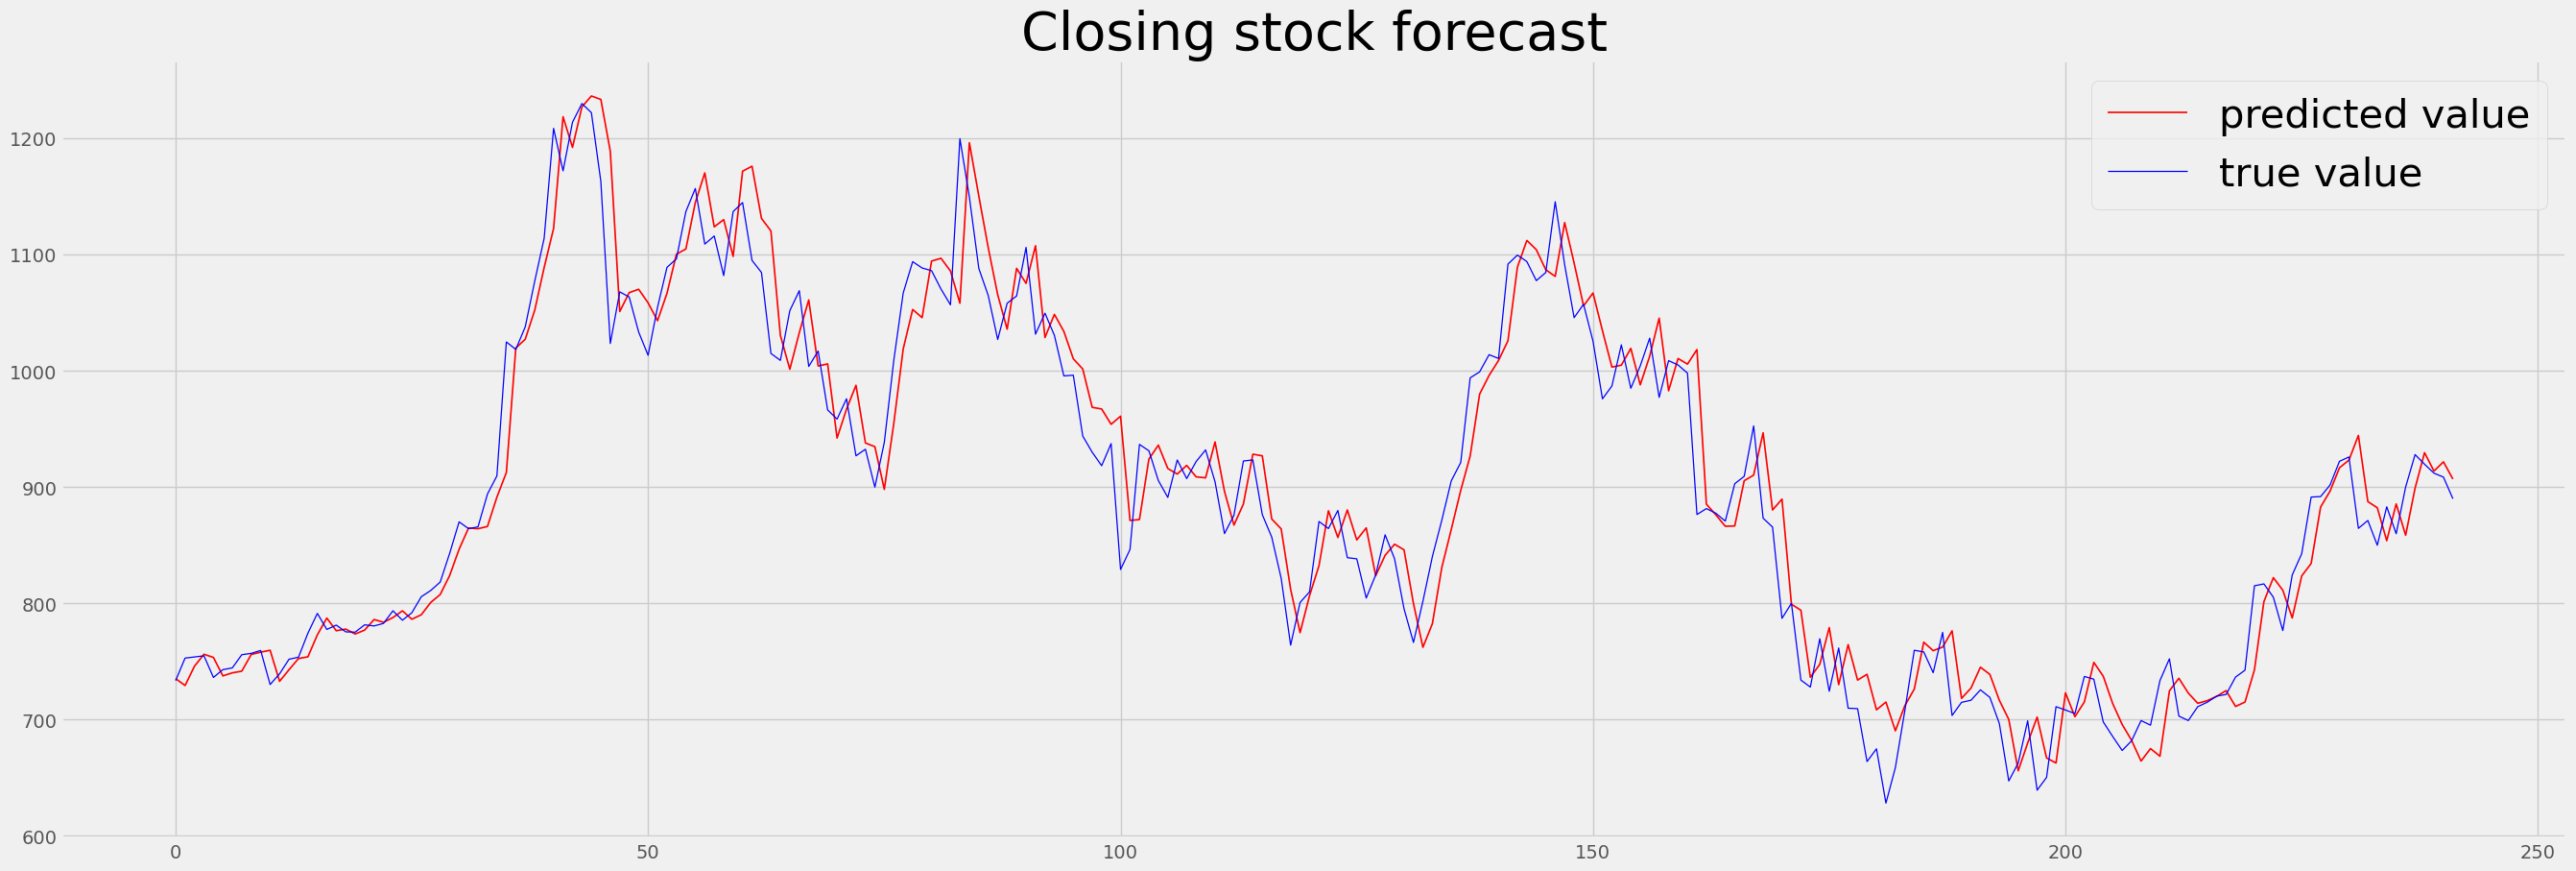

In [66]:
plt_forecast(close_preds, close_real, 'Closing stock forecast')

In [67]:
from keras.layers import SimpleRNN

###### SImpleRNN model

In [68]:
def base_model(inputs):
    x = Conv1D(filters=128,kernel_size=4, activation='relu', name='conv_1D')(inputs)
    x = (SimpleRNN(units = 50, activation='relu', return_sequences = True))(x)
    x = ks.layers.Dropout(0.2)(x)
    x = (SimpleRNN(units = 50, activation='relu', return_sequences = True))(x)
    x = ks.layers.Dropout(0.2)(x)
    x = SimpleRNN(units = 50, activation='relu', return_sequences = True)(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    x = Dense(units=128, activation='relu', name='dense_1')(inputs)
    x = Dense(units=64, name='dense_2')(x)
    x = Lambda(lambda x:x*16, name='lambda_1')(x)
    high_stock = Dense(1, name='high_stock')(x)
    low_stock = Dense(1, name='low_stock')(x)
    open_stock = Dense(1, name='open_stock')(x)
    close_stock = Dense(1, name='close_stock')(x)
  
    model = Model(inputs=inputs, outputs=[high_stock, low_stock, open_stock, close_stock])
    return model

In [69]:
inputs =Input(shape=(4, 64, ))
model = final_model(inputs)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 4, 64)]      0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4, 128)       8320        input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 4, 64)        8256        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4, 64)        0           dense_2[0][0]                    
____________________________________________________________________________________________

In [70]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch /22))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss={
    'high_stock': ks.losses.Huber(), 
    'low_stock': ks.losses.Huber(),
    'open_stock': ks.losses.Huber(), 
    'close_stock': ks.losses.Huber() 
    },
     optimizer=optimizer,
     metrics={
         'high_stock': ['mae'], 
        'low_stock': ['mae'], 
        'open_stock': ['mae'],
        'close_stock': ['mae']
        })
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lr_schedule], verbose=0)

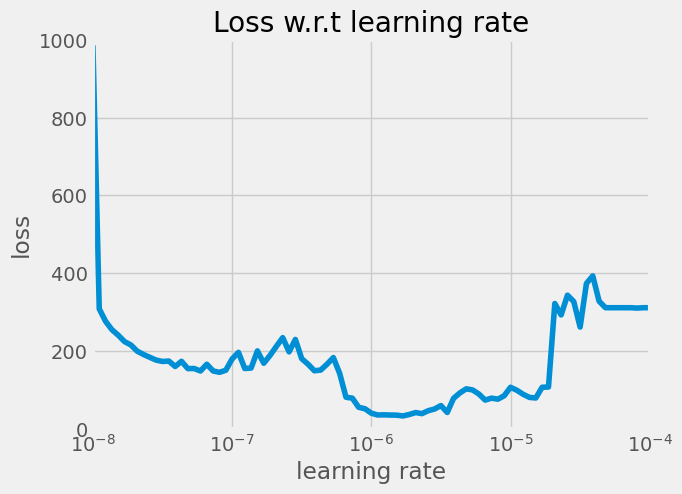

In [71]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 1000])
plt.title('Loss w.r.t learning rate')
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

In [72]:
model = final_model(inputs)
model.compile(loss={
    'high_stock': ks.losses.Huber(), 
    'low_stock': ks.losses.Huber(),
    'open_stock': ks.losses.Huber(), 
    'close_stock': ks.losses.Huber() 
    },
     optimizer=ks.optimizers.SGD(learning_rate=1e-6, momentum=0.9),
     metrics={
         'high_stock': ['mae'], 
        'low_stock': ['mae'], 
        'open_stock': ['mae'],
        'close_stock': ['mae']
        })
history = model.fit(x_train, y_train, epochs=1300, verbose=0)

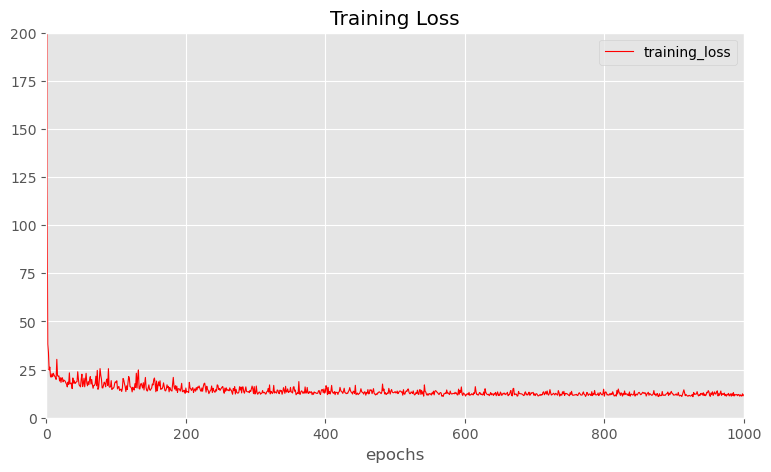

In [73]:
loss = history.history['loss']
epochs = range(len(loss))
plt.style.use('default')
plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
#plt.plot(epochs[400:], mae, color='blue', label='trainig_mae')
plt.plot(epochs, loss, color='red', label='training_loss', linewidth=0.8)
plt.title('Training Loss')
plt.xlabel('epochs')
plt.xlim(0, 1000)
plt.ylim(0, 200)
plt.legend()
plt.show()

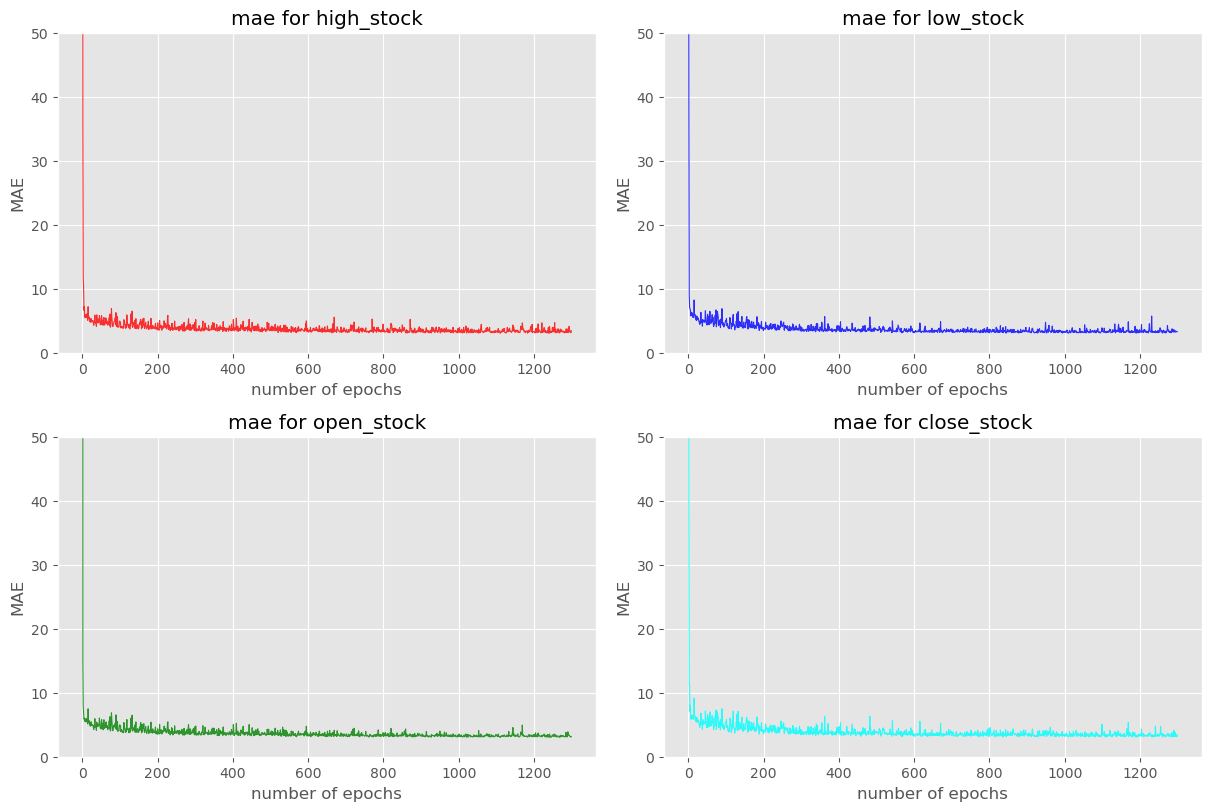

In [74]:
high_stock_mae = history.history['high_stock_mae']
low_stock_mae = history.history['low_stock_mae']
open_stock_mae = history.history['open_stock_mae']
close_stock_mae = history.history['close_stock_mae']
epochs = range(len(high_stock_mae))
result = []
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
spec = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])
ax = [ax1, ax2, ax3, ax4]
stock = [high_stock_mae, low_stock_mae, open_stock_mae, close_stock_mae]
title_stock = ['mae for high_stock', 'mae for low_stock', 'mae for open_stock', 'mae for close_stock']
color = ['red', 'blue', 'green', 'cyan']
for i in range(4):
    ax[i].plot(epochs, stock[i], color=color[i], alpha=0.8, linewidth=0.8)
    ax[i].set_ylim(0, 50)
    ax[i].set_title(title_stock[i])
    ax[i].set_xlabel('number of epochs')
    ax[i].set_ylabel('MAE')

In [75]:
history3 = model.evaluate(x_val,y_val)

8/8 [==============================] - 0s 0s/step - loss: 153.8609 - high_stock_loss: 36.9444 - low_stock_loss: 37.6482 - open_stock_loss: 37.3121 - close_stock_loss: 41.9562 - high_stock_mae: 37.4411 - low_stock_mae: 38.1459 - open_stock_mae: 37.8093 - close_stock_mae: 42.4546


In [76]:
history3[5]

37.44105911254883

In [77]:
forecast = model.predict(x_val)
forecast = np.array(forecast)
forecast.shape

(4, 242, 4, 1)

In [78]:
def sep_target(data):
    high_hat = []
    low_hat = []
    open_hat = []
    close_hat = []
    for zeroth in data[0, :, :]:
        high_hat.append(zeroth[0][0])
        low_hat.append(zeroth[1][0])
        open_hat.append(zeroth[2][0])
        close_hat.append(zeroth[3][0])
    high_hat = np.array(high_hat)
    low_hat = np.array(low_hat)
    open_hat = np.array(open_hat)
    close_hat = np.array(close_hat)
    return (high_hat, low_hat, open_hat, close_hat)

In [79]:
high_preds, low_preds, open_preds, close_preds = sep_target(forecast)

In [80]:
def sep_ans(data):
    high_hat = []
    low_hat = []
    open_hat = []
    close_hat = []
    for zeroth in data[:, 0]:
        high_hat.append(zeroth[0])
        low_hat.append(zeroth[1])
        open_hat.append(zeroth[2])
        close_hat.append(zeroth[3])
    high_hat = np.array(high_hat)
    low_hat = np.array(low_hat)
    open_hat = np.array(open_hat)
    close_hat = np.array(close_hat)
    return (high_hat, low_hat, open_hat, close_hat)

In [81]:
high_real, low_real, open_real, close_real = sep_ans(y_val)

In [82]:
def plt_forecast(x, y, title):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(x, color='red', linewidth=1.2, label='predicted value')
    plt.plot(y, color='blue', linewidth=0.9, label='true value')
    plt.title(title, fontsize=40)
    plt.legend(fontsize=30)
  
    plt.show()

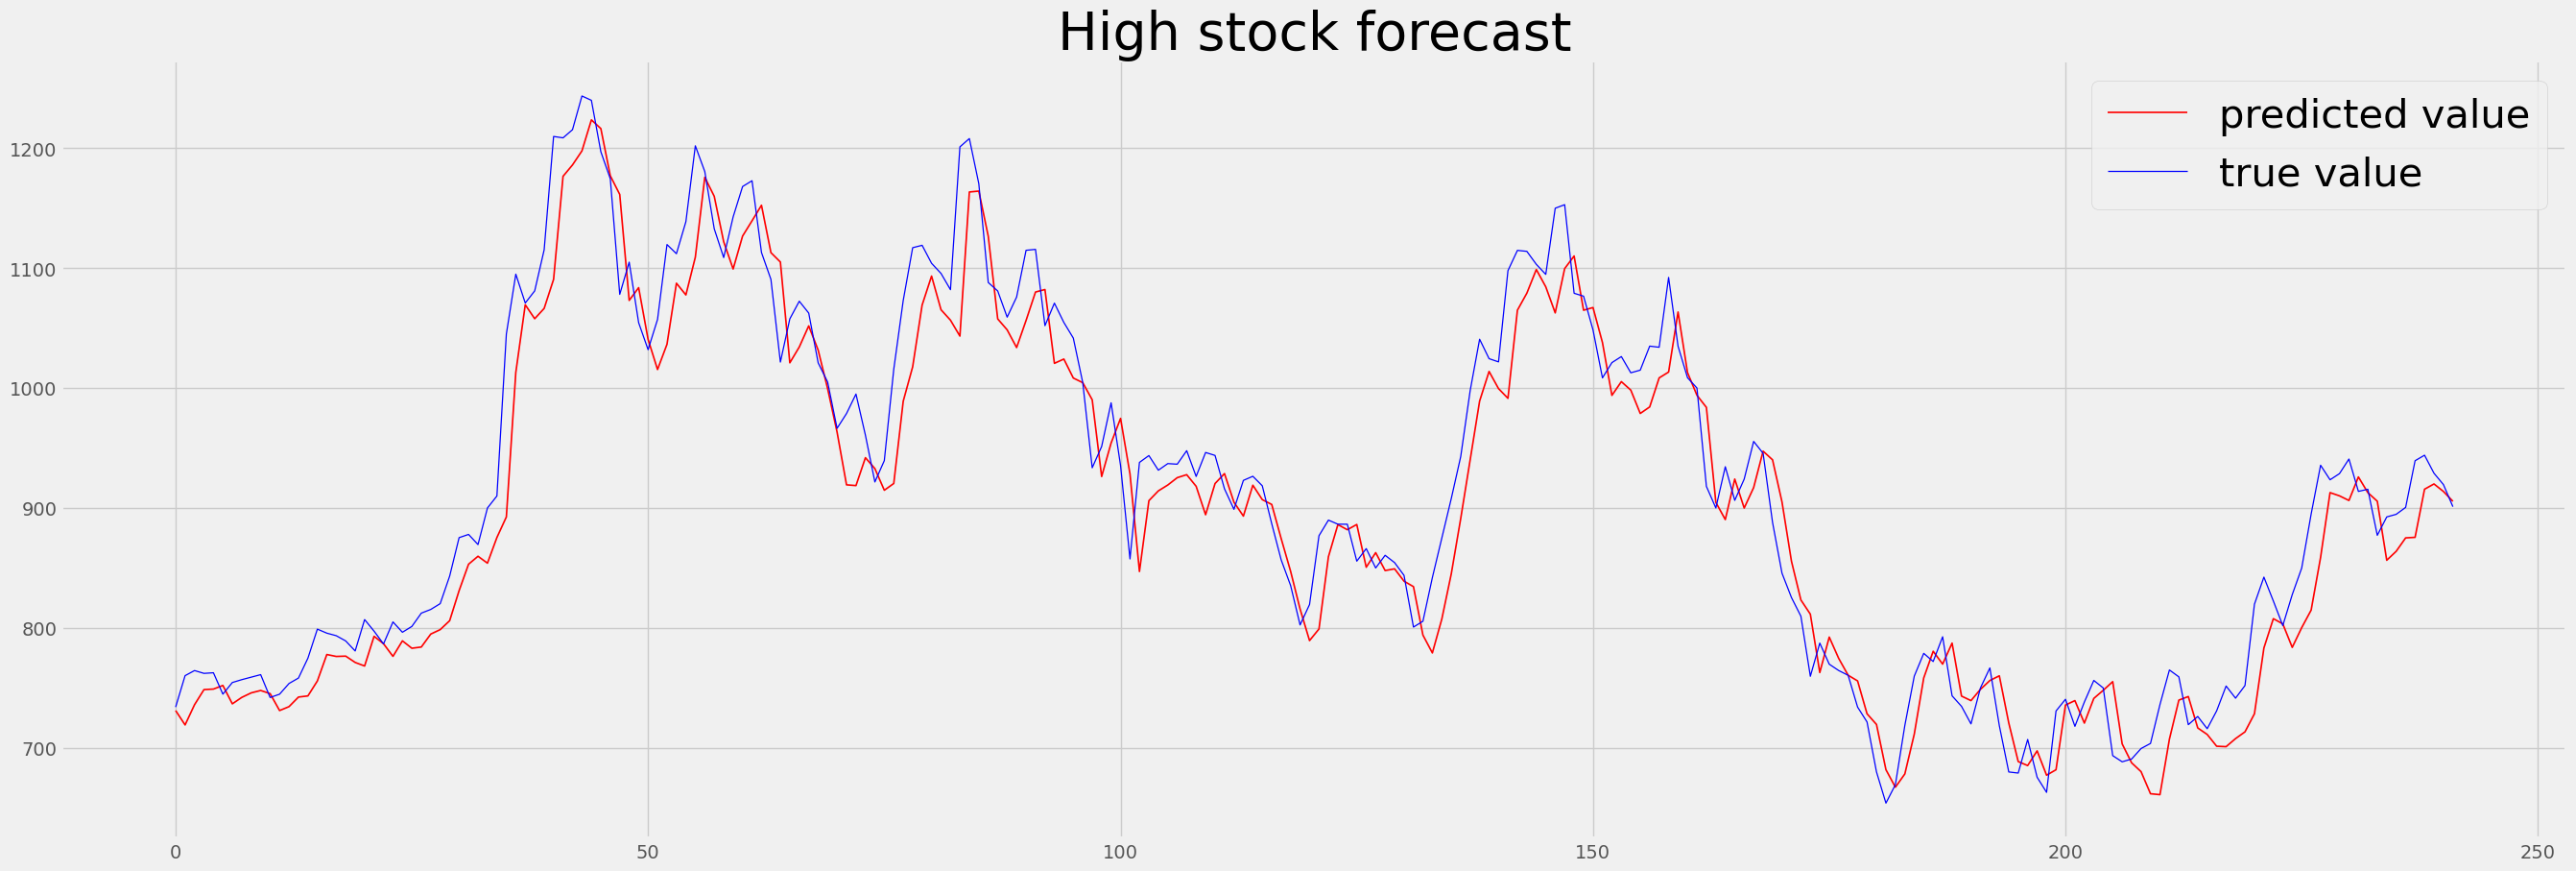

In [83]:
plt_forecast(high_preds, high_real, 'High stock forecast')

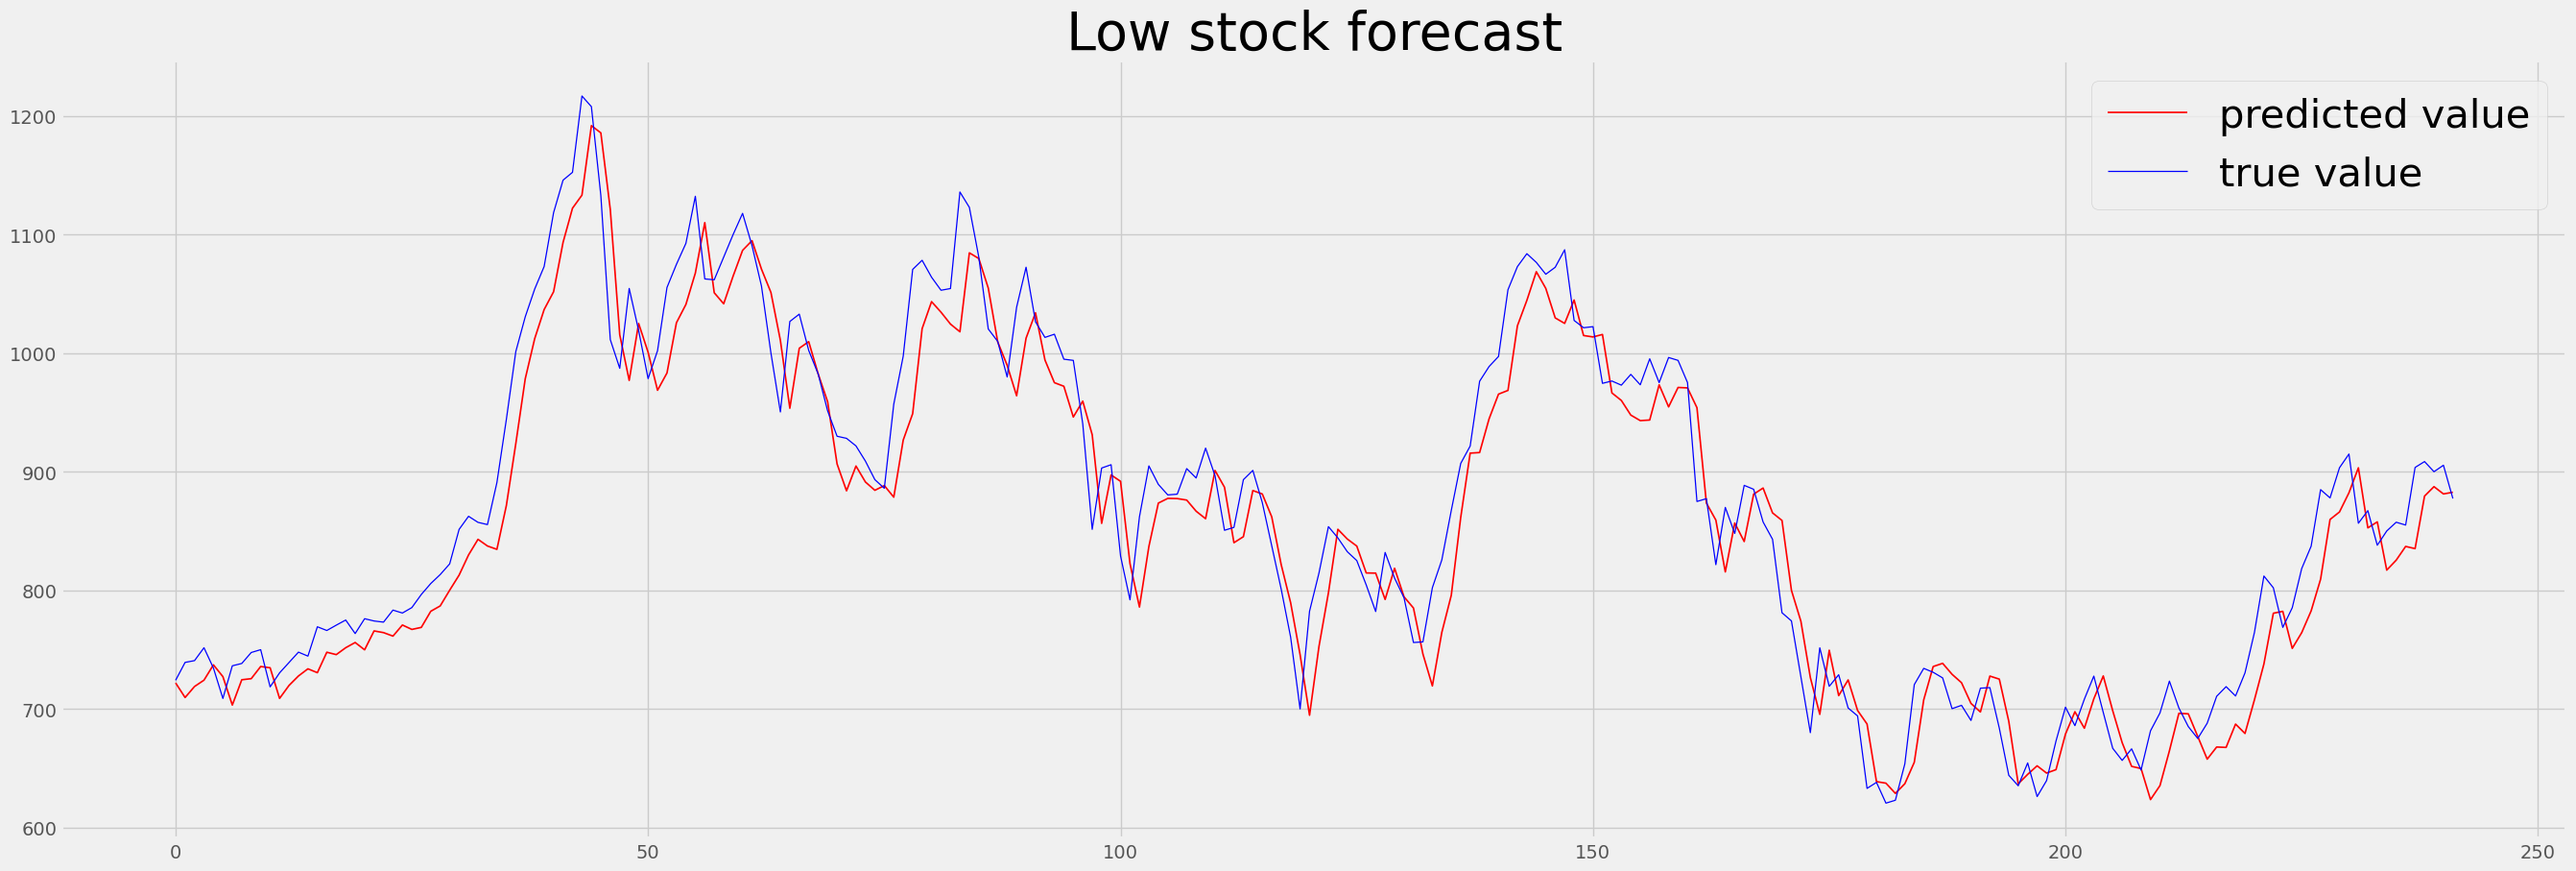

In [84]:
plt_forecast(low_preds, low_real, 'Low stock forecast')

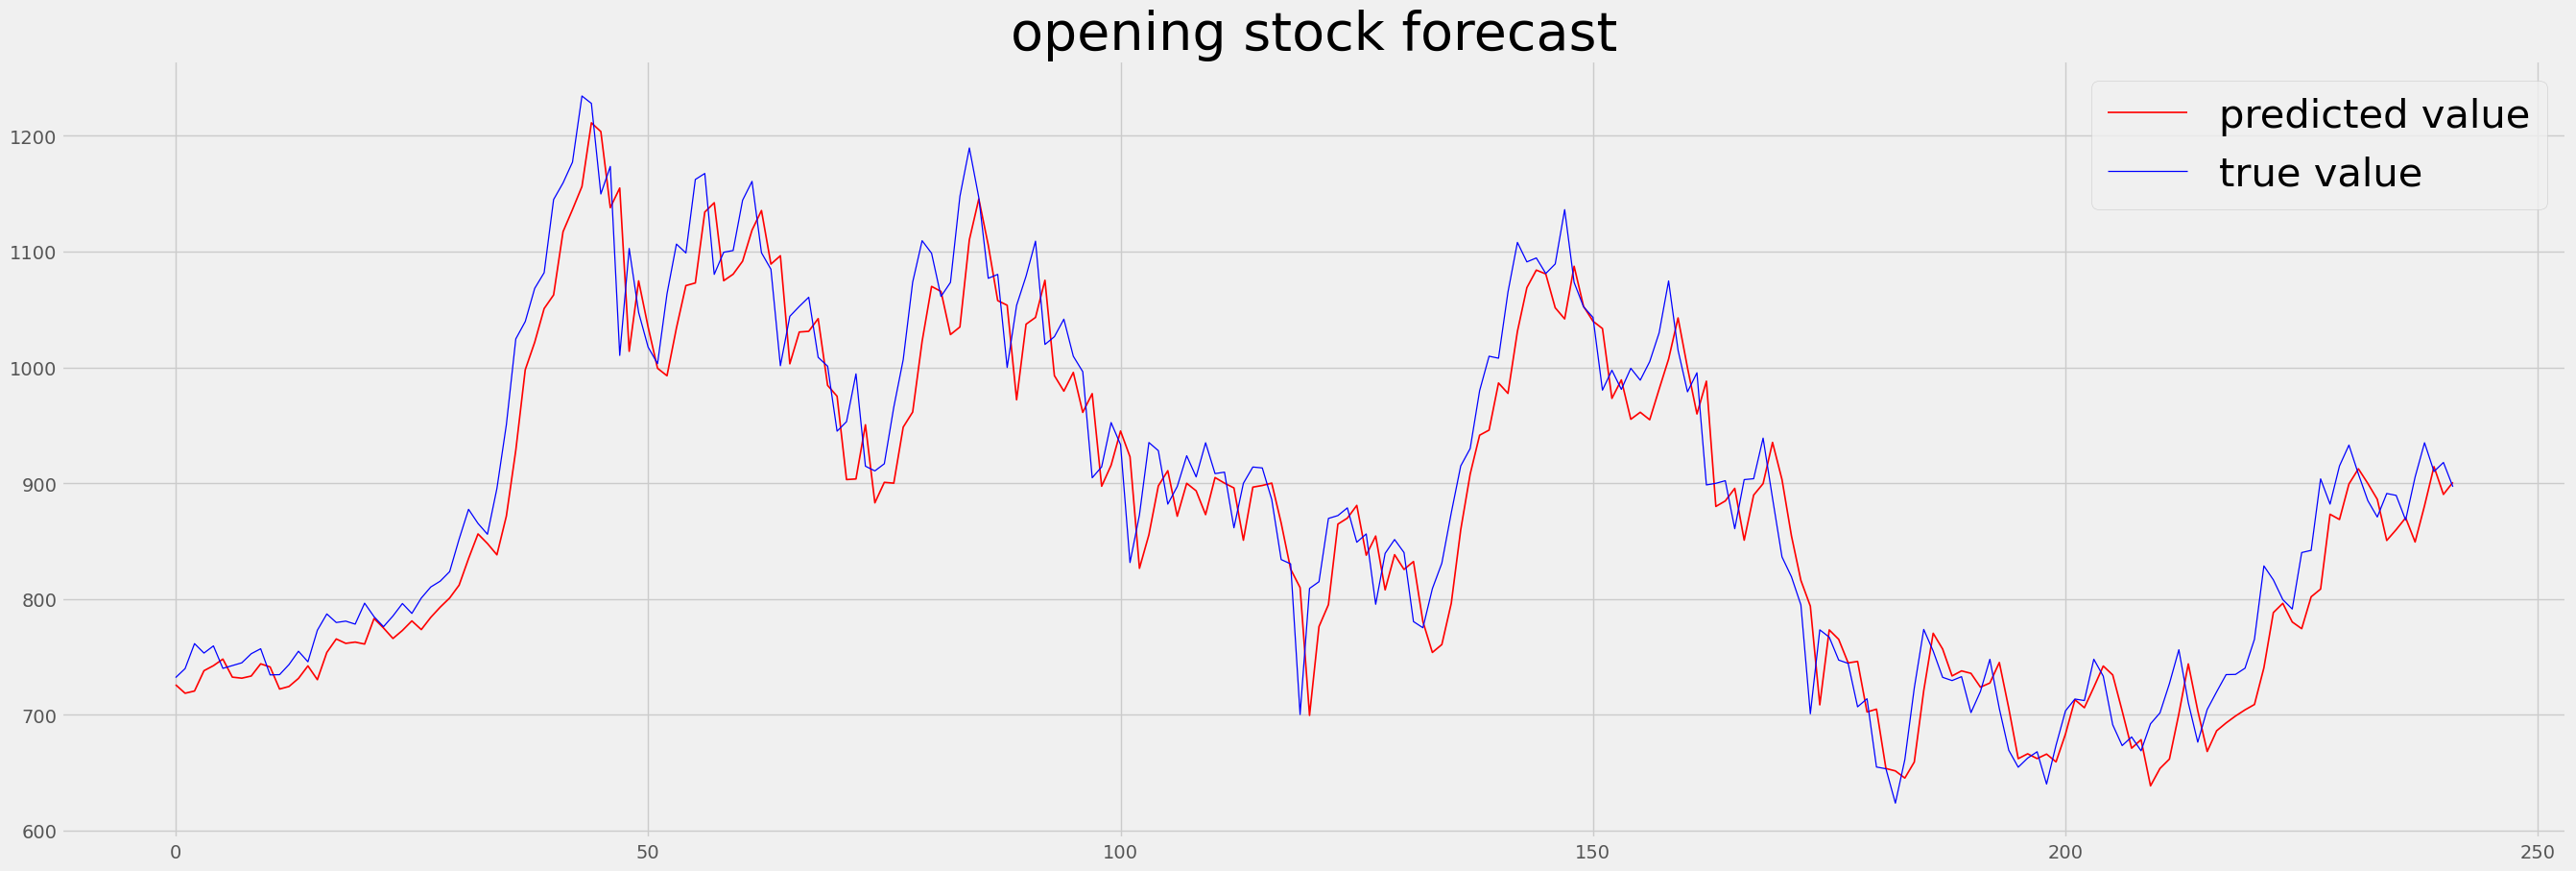

In [85]:
plt_forecast(open_preds, open_real, 'opening stock forecast')

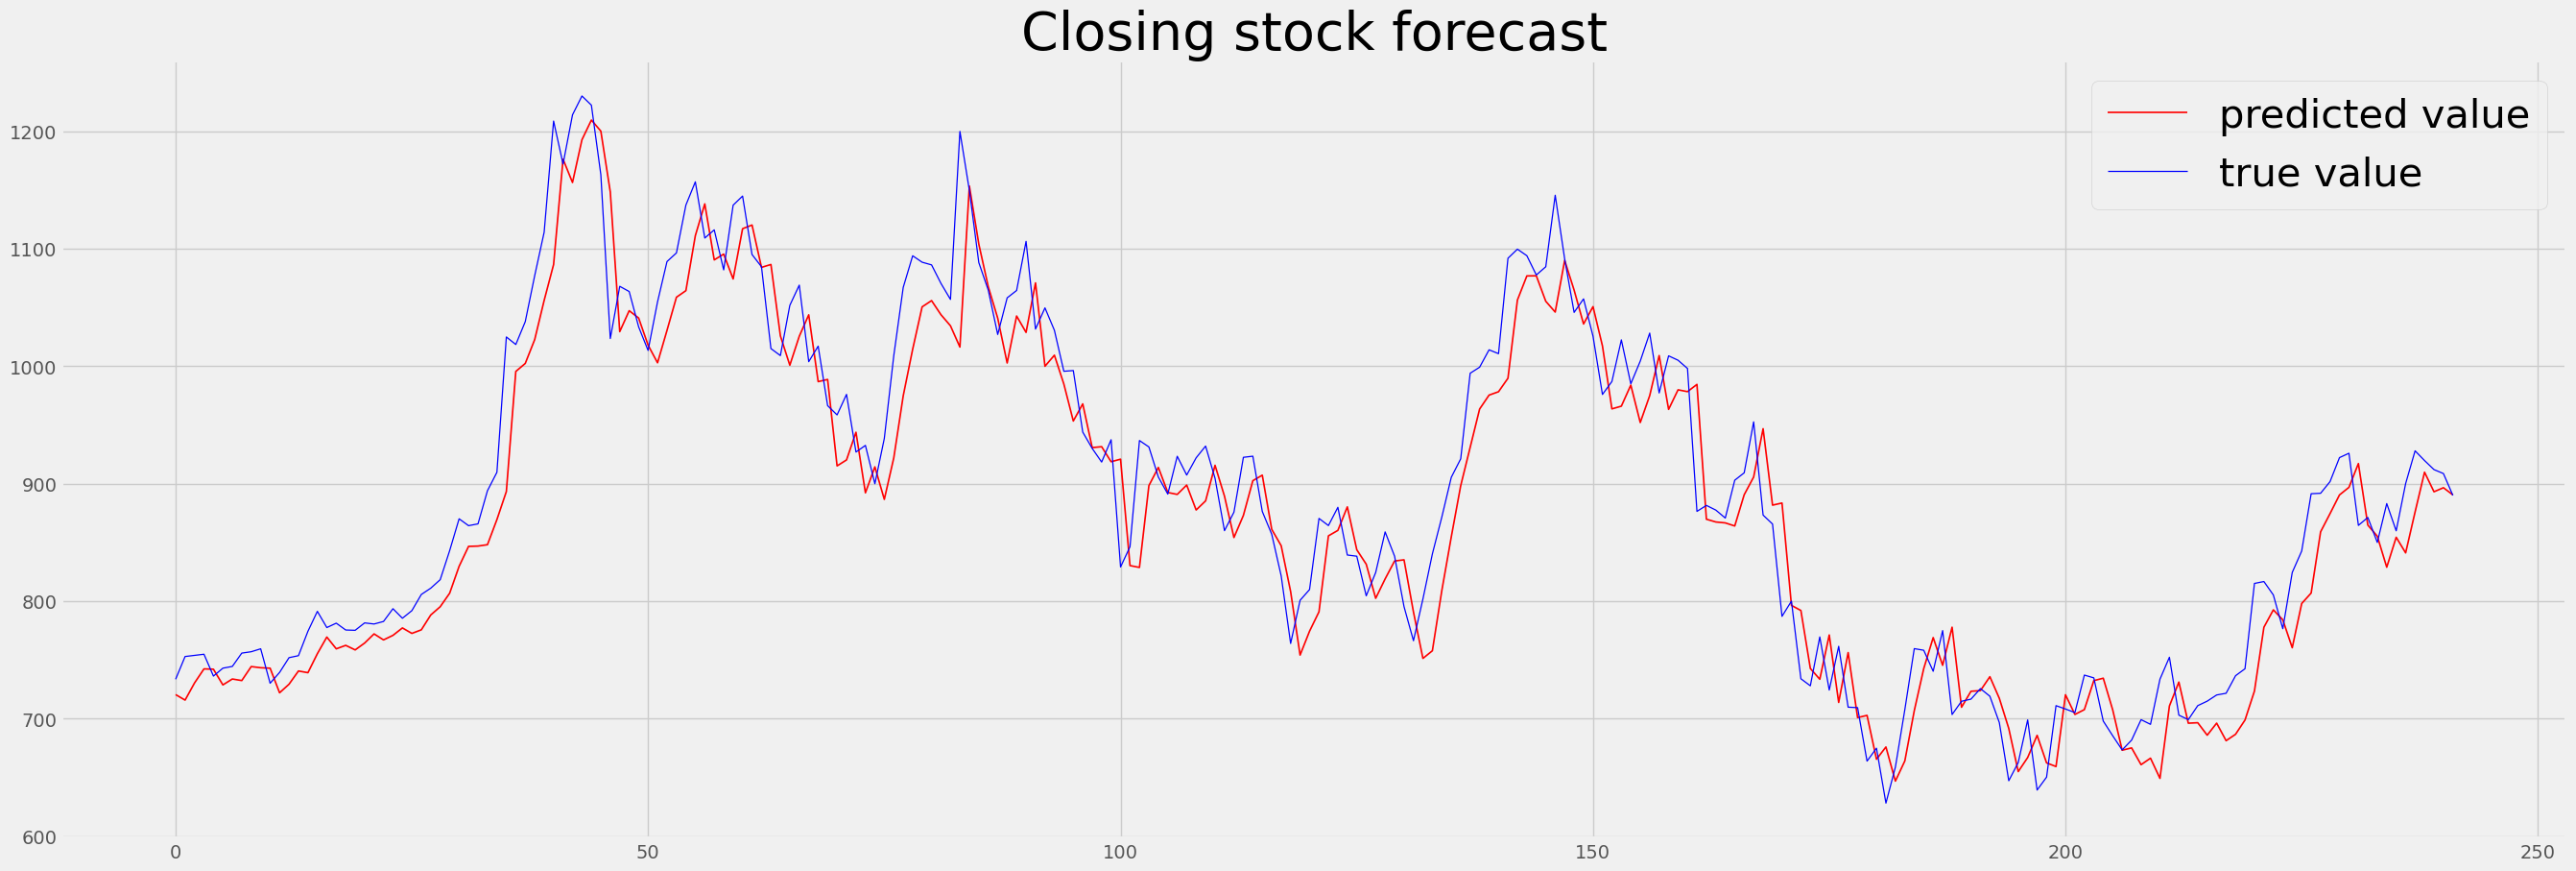

In [86]:
plt_forecast(close_preds, close_real, 'Closing stock forecast')

In [87]:
data = {'MAE_High':[history1[5],history2[5],history3[5]], # creating data contains metrics of evaluation
        'MAE_Low':[history1[6],history2[6],history3[6]],
        'MAE_Open':[history1[7],history2[7],history3[7]],
        'MAE_Close':[history1[8],history2[8],history3[8]],
        'Algo':['Conv-RNN','Conv-LSTM','Conv-BILSTM'] }
df = pd.DataFrame(data) 

In [88]:
df

MAE_High  MAE_Low  MAE_Open  MAE_Close         Algo
0     34.03    33.99     48.78      33.50     Conv-RNN
1     33.52    33.98     34.47      34.25    Conv-LSTM
2     37.44    38.15     37.81      42.45  Conv-BILSTM

In [90]:
import plotly.graph_objects as px
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy
  
# function of numpy.random 
np.random.seed(42)
  
random_x= np.random.randint(1,101,100) 
random_y= np.random.randint(1,101,100)
  
x = ['Conv-RNN','Conv-LSTM','Conv-BILSTM']
  
plot = px.Figure(data=[go.Bar(
    name = 'MAE-HIGH',
    x = x,
    y = [history1[5],history2[5],history3[5]],text=data['MAE_High'], textposition='auto'
   ),
                       go.Bar(
    name = 'MAE-LOW',
    x = x,
    y = [history1[6],history2[6],history3[6]],text=data['MAE_Low'], textposition='auto'
   ),
                       go.Bar(
    name = 'MAE-Open',
    x = x,
    y = [history1[7],history2[7],history3[7]],text=data['MAE_Open'], textposition='auto'
   ),
                       go.Bar(
    name = 'MAE-CLOSE',
    x = x,
    y = [history1[8],history2[8],history3[8]],text=data['MAE_Close'], textposition='auto'
   ),
                       
])
plot.update_traces(texttemplate='%{text:0.3f}',textposition='outside')
plot.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
plot.show()
                

###### from the above plots the forecast was close to the real price. Thus the model evaluated and the models forecast is great.